In [1]:
import pandas as pd
import re
import demoji
import numpy as np
from textblob import TextBlob
import sys

In [2]:
#dataset = pd.read_excel('Covid_19_dataset_with_final_encoding.xlsx')
dataset = pd.read_excel('Covid_19_dataset_with_encoding.xlsx',encoding='utf-8')

In [3]:
dataset.head()

,opinion,Category
0,করোনা একটি ভাইরাসঘঠিত রোগ। সম্রতি এর প্রার্দুভ...,1
1,"৫০ দিন বাসা থেকে বের হচ্ছি না, কিন্তু এইভাবে ...",2
2,আরও বেশি আক্রান্ত হবে ৷আগামী ১৫ দিন পর প্রত্যে...,2
3,এটি আমাদের মধ্যে সবচেয়ে খারাপ ঘটনা হতে পারে। ...,1
4,করোনা এক ধরণের মহমারী।-যা এ সময়ে বড় একটি আতংক।,2


In [4]:
catagori_map={1:0,2:1,3:2}
dataset['Category']=dataset['Category'].map(catagori_map)

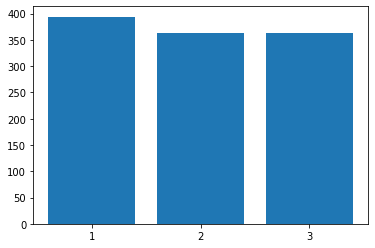

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
# import some data to play with
df=pd.read_excel('Covid_19_dataset_with_encoding.xlsx')
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
class_names = y
labels, counts = np.unique(y, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

In [5]:
dataset.isnull().sum()

opinion     0
Category    0
dtype: int64

In [97]:
dataset.shape

(1120, 2)

In [98]:
dataset.groupby('Category').size().reset_index(name='counts')

,Category,counts
0,0,394
1,1,363
2,2,363


# REMOVE EMOJI

In [99]:
demoji.download_codes()

... OK (Got response in 0.54 seconds)
Writing emoji data to C:\Users\Riyad\.demoji\codes.json ...
... OK


In [100]:
dataset['opinion'] = dataset['opinion'].apply(lambda x: demoji.replace(x,""))

In [101]:
dataset.head()

,opinion,Category
0,করোনা একটি ভাইরাসঘঠিত রোগ। সম্রতি এর প্রার্দুভ...,0
1,"৫০ দিন বাসা থেকে বের হচ্ছি না, কিন্তু এইভাবে ...",1
2,আরও বেশি আক্রান্ত হবে ৷আগামী ১৫ দিন পর প্রত্যে...,1
3,এটি আমাদের মধ্যে সবচেয়ে খারাপ ঘটনা হতে পারে। ...,0
4,করোনা এক ধরণের মহমারী।-যা এ সময়ে বড় একটি আতংক।,1


In [102]:
#ataset =dataset['opinion'].apply(lambda x: demoji.replace(x,""))
dataset['opinion'] = dataset['opinion'].apply(lambda x: demoji.replace(x,""))
for index,value in dataset.iterrows():
    print(value['opinion'])

করোনা একটি ভাইরাসঘঠিত রোগ। সম্রতি এর প্রার্দুভাব মারাত্নক আকার ধারন করেছে।  তবে, উন্নত দেশ গুলোতে ব্যপক গবেষনা চালানো হচ্ছে এটির প্রতিকারিতার লক্ষ্য।  তবে, আপাতত, আমাদের করনীয় সঠিক সাস্থ্যবিধি মেনে চলা, এবং জরুরি প্রয়োজন ব্যতীত বাহিরে বের না হওয়া।    
৫০ দিন বাসা থেকে বের হচ্ছি না,  কিন্তু এইভাবে তো আর থাকা সম্ভব না।  আল্লাহ আমাদের হেফাজত করুক। 
আরও বেশি আক্রান্ত হবে ৷আগামী ১৫ দিন পর প্রত্যেকটা মানুষই চোখে সরষেফুল দেখবে ৷
এটি আমাদের মধ্যে সবচেয়ে খারাপ ঘটনা হতে পারে। বিশ্বের সাধারণ ক্রিয়াকলাপ বন্ধ করেছে। ভাইরাসের এমন ক্ষমতা রয়েছে এবং এটিকে কখনই হালকাভাবে নেওয়া উচিত নয়। দুর্ভাগ্যক্রমে আমরা (বাংলাদেশ) এটি না ছড়ানো পর্যন্ত এটিকে গুরুতর বিষয় হিসাবে গ্রহণ করি নি যা রোধ করা যেতে পারত। তবে এখন আমরা যা করতে পারি তা হ'ল নিজেকে পরিষ্কার রাখা এবং এটি অন্যের কাছে না ছড়িয়ে দেওয়ার জন্য যথাসাধ্য চেষ্টা করা। এবং আমাদের গবেষকরা ইতিমধ্যে যা ছড়িয়ে পড়েছে। মেডিসিন এর জন্য অপেক্ষা করুন।
করোনা  এক ধরণের মহমারী।-যা এ সময়ে বড় একটি আতংক।  
করোনা পুরো পৃথিবীকে যেভাবে আক্রান্ত করেছে তা নিয়ে নতুন করে চি

আমাদের বাংলাদেশকে ভাল রাখার জন্য আমরা যে যেভাবে পারছি কিছু না কিছু করছি এই দুর্যোগের সময়। আমাদের দেশে পায় ৭ কোটি মানুষ দিন আনে দিন খায় আর ২ কোটি আছে মধ্য বিত্ব যারা না পারে হাত পাততে । অনেকেই চেষ্টা করছেন তাদের পাশে দারাতে কিছু না কিছু দিয়ে সহযোগীতা করতে।কিন্তু ভাই একটু কি বেভে দেখেছেন এতে কি মানুষকে এই ভাইরাস থেকে দূরে রাখতে পারছি। প্রতিদিন তারা রাস্তায় নেমে আসছে খাদ্য সামগ্রী পাওয়ার আাসায় এক জাগায় জর হচ্ছে শত শত মানুষ এতে কি দেশ নিরাপদ থাকছে না মানুষ, আমি মনে করি এগুলোর একটা তালিকা করা হোক এবং যারা ভাসমান তাদের সরকারি স্কুল এবং কলেজ গুলোতে রেখে খাবারের ব্যবস্থা করা হোক। এবং যারা খাবার দিচ্ছি তারা তাদের বাসায় দিয়ে আসি।তাহলে এই লোক গুলো রাস্তায় বের হতে পারবে না এবং দূরত আল্লাহ আমাদের এই ভাইরাস থেকে মুক্তি দিবে।
এই সমস্যার একটাই কারন, আয়তনের তুলনায় অধিক জনসংখ্যা।
গৃহহীন মানুষগুলোকে থাকা খাওয়ার ব্যাবস্থা করে দেওয়া হোক হাজার হাজার কোটি টাকা জনগনের জন্য বরাদ্দ হলে ছিন্নমূুল মানুষ গুলোও এর অংশিদার তাই তাদের হকের টাকায় তাদেরকে পারিচালিত করার জন্য সরকার ও প্রশাসনের নিকট অনুরোধ জানাচ্ছি।
দেশ

করোনাভাইরাসে সংক্রমণের শিকার ব্যক্তিদের জন্য সবচেয়ে প্রয়োজনীয় যন্ত্র এখন ভেন্টিলেটর। অথচ বাংলাদেশের সাড়ে ১৬ কোটি জনগণের বিপরীতে ভেন্টিলেটর রয়েছে প্রায় ১৮০০টি।
দেশের চাকা সচল রাখতে কিছু জায়গায় কাজ চালাতে হবে এবং কিছু প্রতিষ্ঠান খোলা রাখতে হবে, কিছু করার নাই
শুধু বন্ধ করলে কি আর হয়,,যদি খাবার সংকটে দেখা দেয়, তখন কি করবেন,ভাবা উচিত
 এই কড়াকড়ি আরোপ আরো আগেই করা উচিত ছিল
গ্রামের দিকের অবস্থা ভয়াবহ, কোন নিয়ম মানা হচ্ছে না। সামাজিক দুরত্ব মানছে না কেউ। প্রশাসনের দৃষ্টি আকর্ষণ দাবি ।
সব ধরনের দুর পাল্লার পরিবহন বন্দ করে দেয়া হোক আরো কঠোর পদক্কেপ নেওয়া উচিত
আপনারা কি ভাবছেন? দুই চার হাজার মরার পরে ব্যাবস্তা করবেন ? সরকার সরকারের আমলা কামলা প্রশাশন সবাই এবার ঘুম থেকে জাগুন ।
জনগণের ম্যান্ডেটবীহিন সরকারের অদক্ষতা, অদূরদর্শীতা, অব্যাবস্হাপনা, সিদ্ধান্তহীনতা, সমম্বয়হীনতা, উদাসীনতা, অসচেতনতা, অসততা, লুকোচুরি, তথ্য গোপন ও করোনা প্রতিরোধে নজির বীহিন ব্যর্থতার কারণে জাতি আজ এক চরম অনিশ্চয়তা ও ভয়াবহ মানবিক বিপর্যয়ের দারপ্রান্তে।
বাংলাদেশের সকল জেলা,উপজেলা এবং ইউনিয়ন পর্যায়ে সকল চেয়ারম্যান, মেম্বারদের গো

বাংলা দেশের চিকিৎসা ব্যবস্থা এত খারাপ আর জারা রোগী দের সাথে এমন আছরন করে তাদের উপর আল্লাহর গজব পড়বে আমরা জারা সৌদি আরব থাকি এই খানে এক জন রোগী কে তারা আদরের সাথে চিকিৎসা করে
সকল প্রাইবেট হাসপাতাল আইন করে এই মুহূর্তে বন্ধ করা হোক। সরকারি হাসপাতালের চিকিৎসা ব্যবস্তার মান উন্নত করা হোক, আমরা সবাই, গরিব, ধনী, যদি সরকারি হাসপাতালের চিকিৎসা নেই সমান ভাবে, তা হলে, সরকারি হাসপাতালের চিকিৎসা ব্যবস্তার পরিবর্তন আসবে, মানুষের মধ্যে বৈষম্য থাকবেনা।
 স্বাস্থ্য মন্ত্রীসহ স্বাস্থ্য মন্ত্রনালয়ের প্রত্যেকটা কর্মকর্তা, কর্মচারী আগে থেকেই দ্বায়িত্বে ফাকি দেয়া তো ছিলো নিত্য দিনের ব্যাপার আর এখন নার্স, স্টাফ, ওয়ার্ড বয় এমন কি ডাক্তাররাসহ সবাই তারা কাজে মারাক্তক গাফিলতি করছে যা বলার অপেক্ষা রাখে না, তাই স্বাস্থ্য মন্ত্রী পদত্যাগ সহ স্বাস্থ্য মন্ত্রনালয়কে আবার নতুন করে ঢেলে সাজানো অতি জরুরী হয়ে পরেছে
বাংলাদেশের সরকারি এবং বেসরকারি হাসপাতাল গুলা এক একটা কসাই খানায় পরিনত হয়েছে। এগুলো হাসপাতালে যারা দায়িত্ব পালন করে তারা হলো এক একটা সাংঘাতিক জানোয়ার শুয়োরের বাচ্চা শুয়ার।
এরা মুখে বলে একশন কাজের বেলায় কি

আমাদের যেই সর্দি কাশি এটাও করোনা। এগুলো নিয়ে মিথ্যা বক্তব্য দেয়ার কোনো দরকার নেই।
 ঢাকা ও ঘনবসতিপূর্ণ এলাকা থেকে মানুষকে বাড়িতে যেতে দেওয়া হোক। তাহলে শহরের সংক্রমণ কমবে। শহরে ঝুঁকি বেশি।
সব তো সীমিত আকারে খুলেছেন গণপরিবহন ও সীমিত আকারে খুলে দেন
ঢাকায় করোনার ভেতরে ঢোকা যেমন বন্ধ করতে পারে নাই ।বের হওয়া ও বন্ধ করতে পারবেনা ।
ঢাকার বাইরে যে সকল পোশাক শ্রমিক আছে তাদের ঢাকা ঢোকার জন্য মালিক পক্ষ চাপ দিচ্ছে
কি লাভ গণপরিবহন বন্ধ করে কি লাভ লকডাউন করে মানুষ কি ঢাকা থেকে বের হয়নি ঢাকা ঢুকেনি তাই সরকারের কাছে অনুরোধ নিয়ম মেনে যদি দোকান মার্কেট খোলা থাকতে পারে তাহলে নিয়ম মেনে গণপরিবহন চালু করলে মনে হয় ভালো হয় আর তা না হলে সংক্রমণ আরো বেশি হতে পারে।
শেষে মারার জন্য পরিবহন শ্রমিকগুলোরে পাইছে ঠিকঠাক মতো
কোথাও গিয়ে দাড়াবে দেশ, কি হবে দেশের মানুষের কেউ জানেনা।
করোনা মহামারীর কাছে জীবন যখন অসহায়, মানুষ যখন নিরুপায়।মানবতা যখন পরাজিত, বিবেক যখন অন্ধ।
জীবনে অনেক ঈদ আসবে, কিন্তু জীবন একটাই, শুধুমাত্র এই ঈদ সচেতন হোন, নয়তো জীবনে আর ঈদ দেখা হবে না
 বিশ্ব স্বাস্থ্য সংস্থা কি করে সব তো মানুষে করে বা নিজ ন

অধিকাংশ উপজেলা হাঁসপাতালে ডাক্তারদের সুরক্ষার জন্য প্রয়োজনীয় মাস্ক গ্লাবস, গাউন নাই। সব কয়টি এক্সরে মেশিন হয় নষ্ট না হয় অপারেটর নাই, ব্যাডে কোন রোগী থাকেনা,ডাক্তার আসেন নার্স থাকেন না,প্রেস ক্রিপ শন পাওয়া গেলে ও ঔষধ থাকেনা,এই হচ্ছো হাসপাতালের অবস্তা
বিলাস বহুল হাসপাতাল নয় ডাক্তারদের নিরাপত্তা আর চিকিৎসকা সেবার মানসিকতা চাই।রোগ আর রোগী নিয়ে লুকুচুরি নয়।
কজন ডাক্তার হিসেবে আমি বলতে পারি উদ্যোগটি প্রশংসনীয়। সাধারণ সকল হাসপাতালের চেয়ে এটি বেশী উপকারী হবে কারণ এখানে শুধু করোনা রোগীরাই আসবেন। তাহলে অন্য রোগের রোগীরা যেমন নিরাপদ থাকবেন তেমন ডাক্তাররাও অন্য রোগীর চিকিৎসা দিতে অপারগতা প্রকাশ করবেন না।
ইষ্ট লন্ডনে নিউ করোনা হসপিটাল দুই সপ্তাহে বানানো হয়েছে।আমাদের দেশের করোনা হসপিটালের কাজ কতোদূর এগিয়েছে কেউ কি জানাবেন প্লীজ।দেশ যখন সিঙ্গাপুর তখন প্রশ্ন তুলতেই পারি।
সকল শিল্পপতি যদি অসহায় মানুষের পাশে দাড়ায় তবে একটা মানুষ ও না খেয়ে থাকবে না বাংলাদেশে
মাত্র ৬০ জন রোগীর জন্য ৮ হাজার শয্যার হাসপাত,যেখানে এখন পর্যন্ত পিপিই পৌছানো হয় নি সেখানে এত বড় হাসপাতাল তামাশা মাত্র।
হাসপাতালে গরীবের চিকিৎসা হবে

লাশ নিয়ে কেন এই আতঙ্ক?বলা হয়ে থাকে জীবন্ত করোনা রোগী হতে তিনফুট দূরত্ব বজায় রাখলে নিরাপদ।তাহলে লাশ থেকে কেন যোজন যোজন দূরত্বে থাকতে হবে!!!
পুলিশের উচিৎ বাধা দেওয়া জানোয়ার গুলোকে থানায় নিয়ে শিক্ষা দেয়া যে লাশ দাফন হবে মৃত ব্যক্তির জাগায়। তোদের বাপের জাগায় না। পিঠের চামড়া তুলে ফেলার দরকার।
যারা লাশ দাফনে বাধা দেয় তাদেরকেই আগে কবর দেওয়া উচিৎ তার পরে লাশের দাফন হবে।
এটা অমানবিক কাজ এবং প্রশাসন অদক্ষতার পরিচয় দিয়েছে ।
এটা মোটেও দুঃখ জনক ঘটনা না!করোনার এই সময়ে লাশ নিয়ে এতো দূরে কবর দেওয়ার কোনো যৌক্তিকতা নেই! করোনা আক্রান্ত রুগী মারা গেলে সবচেয়ে কাছাকাছি স্হানে দাফন করতে হবে!!!!
মানবতা আজ কোথায়, বাঙালী করোনা_ভয় কে তুচ্ছ করে সব কিছু করতে পারছে...আর কোরোনায় মৃত ব্যক্তিকে এতো ভয়...... বাঙালীর সত্যিই মৃত মানবতা
মহামারির মধ্যে মহা অসভ্য বর্বরদের হানা আরো ভয়ংকর। এইসব মহা মহা বর্বরদের সামাজিক ভাবে প্রতিহত করা অতীব জরুরী। এটা কোনভাবেই মেনে নেয়া যায়না।
যদি এই মৃত ব্যাক্তির করোনা টেস্টে রিপোর্ট নেগেটিভ আসে তাহলে কি করবেন.....?তাকে তো গ্রামের মাটিতে দাফন করতে দিলেন না। কি জবাব দিবেন তার পরিবারকে..

আমাদের দেশে লকডাউন সঠিক ভাবে করতে পারেনি এবং লকডাউনের পরিচালক সঠিকভাবে সঠিক সিদ্ধান্ত জনগণ বুঝাতে পারেনি
করোনা হলেও বেঁচে যেতাম তাহলে অন্তত বেকারত্ব থেকে তো মুক্তি পেতাম,,
যারা রোজা পালন করে না তারা বেশি ঈদ নিয়ে মাতামাতি করে । ঈদ উপলক্ষে কেনাকাটা করতে যেয়ে করোনা বেশি করে বিস্তার লাভ করেছে বাংলাদেশে ।
মে মাসে নাকি বাংলাদেশ থেকে করোনা বিদায় নিবে এটা বলেছিল সিঙ্গাপু।। এদের গবেষণা মারাত্মক হুমকি
 এদের গবেষণা ভুয়া।এর প্রমাণ কমেন্টগুলো।আর যাকে করোনা ধরে ১১ দিন পর তার শরীরে কি ভাইরাস থাকেনা নাকি ,যে অন্যকে আক্রান্ত করবে না ? এদের উপর ভরসা করে দেশ পরিচালনা করলে দেশ,দেশই থাকবে কিন্তু মানুষ থাকবে না !
এই সিঙ্গাপুরে বিশেষজ্ঞ দলটা একে বারে ফালতু এর আগে বলেছিল করোনা ভাইরাস বাংলাদেশ থেকে ৯৭% চলে যাবে মে মাসের ১৯ তারিখ কয় এখনো তো কিছুই হলো না।এখন আবার বলে ১১দিন পর কাউকে সংক্রমণ করে না সব ফালতু বানোয়াট খবর।
সবচেয়ে দুঃখজনক, এতো বিভাগ মানুষকে সচেতন করার জন্য কাজ করছেন। ডাক্তার, পুলিশ, বিভিন্ন প্রশাসন বিভাগ, সংবাদ মাধ্যম। এবং সচেতন করতে গিয়ে কতজন প্রাণ দিলেন, আক্রান্ত হলেন। তাঁরপরেও মানুষ বুঝতে চাইছে না।

In [103]:
#dataset.head()

# Remove Punctuation

In [104]:
dataset['opinion'] = dataset['opinion'].str.replace('[০-৯a-zA-Z\.\,\!\?\:\;\-\=\_\'\"।|*/\\॥+->@#$%^&()÷<×৷৳]','')
for index,value in dataset.iterrows():
    print(value['opinion'])

করোনা একটি ভাইরাসঘঠিত রোগ সম্রতি এর প্রার্দুভাব মারাত্নক আকার ধারন করেছে  তবে উন্নত দেশ গুলোতে ব্যপক গবেষনা চালানো হচ্ছে এটির প্রতিকারিতার লক্ষ্য  তবে আপাতত আমাদের করনীয় সঠিক সাস্থ্যবিধি মেনে চলা এবং জরুরি প্রয়োজন ব্যতীত বাহিরে বের না হওয়া    
 দিন বাসা থেকে বের হচ্ছি না  কিন্তু এইভাবে তো আর থাকা সম্ভব না  আল্লাহ আমাদের হেফাজত করুক 
আরও বেশি আক্রান্ত হবে আগামী  দিন পর প্রত্যেকটা মানুষই চোখে সরষেফুল দেখবে 
এটি আমাদের মধ্যে সবচেয়ে খারাপ ঘটনা হতে পারে বিশ্বের সাধারণ ক্রিয়াকলাপ বন্ধ করেছে ভাইরাসের এমন ক্ষমতা রয়েছে এবং এটিকে কখনই হালকাভাবে নেওয়া উচিত নয় দুর্ভাগ্যক্রমে আমরা বাংলাদেশ এটি না ছড়ানো পর্যন্ত এটিকে গুরুতর বিষয় হিসাবে গ্রহণ করি নি যা রোধ করা যেতে পারত তবে এখন আমরা যা করতে পারি তা হল নিজেকে পরিষ্কার রাখা এবং এটি অন্যের কাছে না ছড়িয়ে দেওয়ার জন্য যথাসাধ্য চেষ্টা করা এবং আমাদের গবেষকরা ইতিমধ্যে যা ছড়িয়ে পড়েছে মেডিসিন এর জন্য অপেক্ষা করুন
করোনা  এক ধরণের মহমারীযা এ সময়ে বড় একটি আতংক  
করোনা পুরো পৃথিবীকে যেভাবে আক্রান্ত করেছে তা নিয়ে নতুন করে চিন্তার অবকাশ নেই সবাইকে উচিত সচ

মৃত্যু ব্যাক্তি থেকে করোনা ভাইরাস ছড়ায় না তাদের দাফনে কোনো ভয় পাবার কিছু নাই
আল্লাহ রহমত করো আর রেগে থেকোনা এসব দৃশ্য সহ্য করার মতো নয়
কেউ করোনাই মরতেছে আর কেউ চিন্তাই মরছে রোগ আসলেই কি হয়েছে তা জানার বিষয় আছে না জেনেই করোনাই ধরছে এর নামি উযুকি বাঙ্গালি আপন পর এখনি বুঝার সুমায় এসেছে
করোনা রোগের স্চ্ছতা যাচাই করে মৃতদেহ টা দাফন করা উচিত নয় কি এইভাবে সকল মৃত মানুষকে ঢালাও করে করোনা ভাইরাসে মৃত্যু হয়েছে বলে দেওয়া টিক হবেনা সকল মৃত মানুষকে আল্লাহ্ যেন বেহেস্ত দান করেন আমিন
এরই মধ্যেই যেন আললাহ আশার আলো দান করেন আমিন দোয়া রহিল ঐ সব মানুষ দের প্রতি এই কাজের শাথে থাকবার জন্য
প্রবাসিরা যে দেশ থেকে আসছে ঠিক সেই দেশর ভাইরাস নিয়ে আসছেতাই আমার মনেহয় সব ধরনের ভাইরাস আমাদের দেশে আছে
আমাদের দেশে চীন ইতালী যুক্তরাষ্ট্র সব দেশ দেশ থেকেই আসছে ভাইরাস কারন আমরা কিছুই আবিষ্কার করতে পারিনা শুধু আমদানি করতে পারি
 বাংলাদেশের ভাইরাস আসতে সরকারের ভুল সিদ্ধান্তের কারণে ইটালি থেকে সবার আগে সরকারের ইটালির ফ্লাইট গুলা বন্ধ করা উচিত ছিল
  মার্চ রাতেও দেখেছি বাংলাদেশ এয়ারপোর্টে চিন থেকে মানুষ আসতেআমি ঐ দিন রাত  টার

সবচেয়ে বড় কথা হচ্ছে কি জানেন আমরা কখনো ভালো হব না কারণ সেটার প্রমাণ জাতির দুর্দিনে যারা চুরি করতেছে
আমাদেরকে এই দূর দিনের কথা গুলো সবদা মনের মধ্যে গেঁথে রাখতে হবে
 করোনা বাংলাদেশের কিছুই পালটাইনি বরং বাংলাদেশের চোরদের আসল চেহারা বাহীর হচছে আর বাঙালি জাতি কতো নিন্ম শ্রেনীর তা পুরো পৃথীবি আরো একবার দেখেছে
করোনার ভয়ে পাল্টাছে কোথায় চাল চোর ডাল চোর আর বেরে গেছে মোজাদ্দার চোরা কারবারি সুযোগে সত ব্যবহার করছে নিত্য পন্যের দাম বারিয়ে দিচ্ছে
সেনাবাহিনী ছাড়া সঠিকভাবে এান সাধারণ গরীব খেটে খাওয়া মানুষের ঘরে পৌঁছাবেনা এখন ঠিক হয়েছে গরীব মানুষ সঠিক ভাবে এান পাবে
আমাদের এলাকায় সেনাবাহিনীকে ত দায়িত্ব দেওয়া হয়নি জনপ্রতিনিধি্রাই দিচ্চেন তাই আমি আস্থা রাখতে পাচ্ছি না
সব মিথ্যা কথা আমাদের বাসায় নিচতলায় দূইজনের করোনা রোগী ধরা পড়েছে এখন আমরা ও আটাকা পারে গেছি কে ও তো খোঁজ খবর নেয় না বরং আমাদের কোন বাজার সদাই লাগলে কাওকে বল্লে যে কিছু কিনে এনে দেন তারা আমাদের হাতে থেকে টাকা ও নিতে চায় না বাজার তো দুরের কথা বলে পারবো না আর কেউ খোঁজ খবর নেয় না
যাদেরকে এান দিচেছন তাদেরকে নূন্যতম  দিনের খাবার দিবেন একই স

এরা কি মৃত্যুর হিসেবে আসছেনা তাহলে কি মৃতের সংখ্যা আরো অনেক বেশি বুঝতে পারছি না
ভাই কি হবে বেঁচে থেকে যদি পৃথিবীর মানুষকে একটু সেবা দিতে না পারে আমাদের মেধাবী ডাঃ ভাইয়েরা পালালে কি বাঁচতে পারবে
এই বিপদে বিদেশি ডাক্তার আনা প্রয়োজন  কিউবা ডাক্তার ওদের চিকিৎসা ভাল 
 বাংলাদেশের ডক্টর সুদো ব্যাবসা করতে জানে সেবা দিতে জানেনা
ধিক্কার জনাই আমার দেশের মানুষ রুপি শয়তানদের মহামারিরতে সার্থের জন্য পাগল
সামনে আরো খারাপ দিন আসছে সবাই সাবধান থাকবেন সতর্ক থাকবেন
মারা গেলেই যে করোনা তা কিন্তু নয়অযথা আতংকিতো হবেন না কেউ আতংকিত না হয়ে সচেতন হউন সবাই সবাইকে এই বিপদ থেকে পরিত্রাণ পেতে সাহায্য করুন  আল্লাহ আমাদের পরীক্ষা করচ্ছেনআল্লাহ সকলকে ঈমান দেকমানুষ হওয়ার তৌফিক দান করুনকোন মানুষ কখনো অন্যের মৃত্যু কামনা করতে পারেনা
 আমরা নাকি বাঙালী লজ্জিত আমি এ দেশের মানুষ বলে যে দেশের মানুষের বিবেগ বলে কিছু ই নেই
বাংলাদেশের মানুসের ব্যাবহারে মনে হয়না যে আল্লার জান্নাতের আশা করতে পারি
আর কত বুলি ফাটাবেন স্বাস্থ্য অধিদপ্তর
কেন স্বাস্থ্য ব্যবস্থা কি দুর্বল
কেমন দেশে বাসকরি আমরা
আমার যদি আল্লাহ করো নায় মৃত্যু থাকে তবুও আ

এই ছুটিতে লাভবান হচ্ছে সরকারি কর্মকর্তা কর্মচারি সাধারণ ব্যাবসায় সমাজ ধংশের পথে
শুধু শুক্রবার গুলো খুলা রেখে সারা জীবন ছুটি রাখার প্রস্তাব জানাচ্ছি
ইতিহাসের পাতায় লেখা থাকবে বাংলাদেশের বাঙালি নামক এক জাতি ছিলশুধুমাত্র ঈদের শপিং করতে গিয়ে তারা বিলুপ্ত হয়েছিল
সাধারণ মানুষ পোশাক শ্রমিক করোনা চাষি হিসেবে করোনা চাষ করবে সাধারণ ছুটির আওতাধীন সকলে তদারকি করবে
খুব অন্যায় এটামানবতা আজ বিলুপ্ত প্রায় সবকিছু সীমিত আকারে চলছে এটাও সীমিত আকারে চালানো হোক যার যার অবস্হান থেকে আওয়াজ তুলুন
তাও ভালো করোনা জনসংখ্যা বৃন্ধির হাড় কমিয়ে দিয়েছে
ধনীরা ঋণ পাচ্ছে গরিবেরা পাচ্ছে ত্রাণ মধ্যবিত্তরা নিয়ম করে হাত ধুয়ে যান
মাননীয় প্রধানমন্ত্রী পেটে খাবার না থাকলে মনোবল থাকবে কিভাবে
যেখানে জীবন নিয়ে খেলা করছে করোনা সেখানে পোশাক শিল্পের ক্ষতি ব্যাপার না
হোম কোয়ারেন্টাইন সকলকে চিন্তাবিদ করে দিচ্ছে সকলকে এই সঙ্কটময় অবস্থায় হিতাহিত শূন্য মতবাদ না দেবার জন্য আহবান জানাই 
কিন্ডারগার্ডেন শিক্ষকদের বেতন অনেক কম সাহায্যে আবেদন জানাচ্ছি
যারা গরিব তারা ত্রান পাচ্ছেবড় লোকেদের ত্রানের দরকার নেইতবে আমাদের মত শিক্ষক শিক্ষিকাদের হাত প

প্রশাসনের লোক ঘরে খাবার দিয়ে গেলে বের হবোনা আর করোনাতেও ধরবেনা
ইউরোপে এত উন্নত চিকিৎসা প্রতিদিন হাজার হাজার মানুষ মৃত্যু বরণ করতেছে আর আমাদের দেশে মানুষ ঘরে থেকে ভালো হয়ে যাচ্ছে
বিশ্ব স্বাস্থ্য সংস্থা এবং আন্তর্জাতিক নোবেল কমিটির প্রধানের কাছে আমার বিনীত অনুরোধ এই যে আমাদের স্বাধীন বাংলাদেশের মাননীয় স্বাস্থ্ মন্ত্রী মহোদয়কে আগামীতে নোবেল পুরস্কারের জন্য মনোনীত করা হোক
মাননীয় স্বাস্থ্য মন্ত্রীর কাছে বিনীত অনুরোধ আমরা তুলনা চাই না আমরা সাধারণ মানুষ চাই বাংলাদেশের স্বাস্থ্য ব্যবস্থার উন্নয়ন আমরা অসুস্থ হলে উন্নত চিকিৎসা সেবা চাই
আমাদের দেশের স্বাস্থ্যসেবা কত খারাপএই খাতের টাকা সব আপনাদের মত কামালরা খেয়ে পেলেছে এখন যদি মহামারী হয় আমার সাধারণ মানুষেরাই মরবো
আমাদের দেশে মুন্সিগন্জের পিপিই চায়না বলে চালিয়ে দেওয়া যায় কোন জবাব দিহিতা ছাড়াই এই জন্য অন্য দেশের চেয়ে আমাদের দেশের অবস্হা ভালো
গ্রাম্য চৌকিদার হবার যোগ্যতা যার নেই সে হয় একটা দেশের স্বাস্থ্যমন্ত্রী
সাধারণ মানুষ গুলি করোনায় মারা যাচ্ছে কিন্তু এই অসাধারণ মানুষ গুলি বেচে আছে এটা খুব পক্ষপাত মুলক আচরণ
স্বাস্থ্য মন্ত্রী কে করোনা আশঙ্কায়

একজন করোনা রুগী সুস্থ হতে বেক্সিমকোর এই ঔষধের দাম  হাজার টাকা মূল্য কারণ কিছুদিন আগেই নিউজে প্রকাশ হলো একটা কিটের দাম  হাজার টাকা এটাও বলেছেন একজন করোনার রুগী ভালো হওয়া পযর্ন্ত থেকে  টা কিট লাগবে বাকি হিসাব পরে করুন
বেক্সিমকো গ্রুপের কাছে অনুরোধ দামটা যেন সাধারণ মানুষের নাগালে থাকে মৃত্যুর পর টাকা নয় দোয়া দরকার হয়
 টাকার ওপরে দাম হলে কেঊ না কেনাই ভালো ঊপকারিতাও তেমন নয় বরং পার্শ্বপ্রতিক্রিয়া হিসাবে কিডনী ড্যামেজ এর সম্ভাবনাও রয়েছে
দরবেশ এবার লালে লাল হয়ে যাবে অথচ বিশ্ব স্বাস্থ্য সংস্থা একটি বার ও বলে নি রেমডেসিভির কার্যকরী ঔষধ করোনা ভাইরাসের
যদিও বিশ্ব স্বাস্থ্যসংস্থা রেমডেসিভিকে ক্ষতিকর বলে উল্লেখ করেছে কারন এই ঔষধ লিভার ও কিডনির ক্ষতির কারন হতে পারে তারপরও এটা অনুমোদন হইছে কম সময়ে অন্যদিকে জাফরুল্লাহ কীটের অনুমোদন আটকে আছে যদিও এটা জাতির খুব উপকারে আসবে হায়রে বাংলাদেশ
কার্যকর কেমন আগে যাছাই বাছাই করে বাজারযাত করলে জনগনের ভালহবে
দেশে করোনা ঢোকানো হইছে ইচ্ছাকৃত যেন রাজনীতি আর ব্যবসা দুইটাই চলে
করোনা ব্যাবসা শুরু হয়েছে
দরবেশদের সিন্ডিকেট ঔষধের মূল্য ছয় হাজার টাকা তারা ভালো করে জানে ক

সরকারের এই নীতি গরীবদের প্রতি অবিচার করা হয়েছেঅনুমতি যখন দিয়েছে সবাইকে দিতে হবে না হয় কাউকে না
 করোনার কারণে মুসলিমদের সবচেয়ে বড় উৎসবের একটি ঈদ উল ফিতরের জামাত ঈদগাহে আদায় করা যাবেএতেই বুঝা যায় আমরা কতটা গুনাহ করেছিযার কারণে এত বড় একটি গজব আমাদের দিয়েছেনআল্লাহ তুমি সকলকে মাফ করে দিন
এরা নিজেরা মরবে সাথে আমাদের নিয়ে ও মরবেআল্লাহ তুমি তাদের বুঝার তৌফিক দান কর
করোনা রোগী বাড়িতে কেন থাকবে  তাদের তো নির্ধারীত হাসপাতালে থাকার কথাকোন গরুকে খোলা মাঠে ছেড়ে দিলে তো সে অন্যের ক্ষতি করবেই 
 এগুলারে ডায়রিয়া আক্রান্ত রুগির জাইঙ্গা দিয়া পিটানো উচিত
এইসব মানুষ ক্রস ফায়ার দেয় না কেনো
শালাকে গুলি করে মেরে ফেলা হোক নিজে তো মরবে আরও দশজন নিয়ে মরবে
নেপালের মত আক্রান্ত ব্যক্তি  দিনের আগে বের হলেই গুলিতাহলে কেউ কোয়ারিন্টিন থেকে পালাবে না
এত মৃত্যুর মিছিল আর চারিদিকে করোনাময় দুঃসংবাদ শুনে কাউকে ঈদের শুভেচ্ছা জানাতে ইচ্ছে করছে না
এদের করোনা হয়া উচিদভাই একটা কথা কি তারা করোনায় ভয়ে আদালত বন্দ করে হাজার হাজার মানুষ বিচার পায়ানাএরা বলে আদালতে আসলেই করোনা হবে এখন তো বিচার কাজ করে অনলাইনে তাহলে কেনো এদের করোনা হোলহে

In [105]:
#def remove_punc(text):
  #txt = re.sub("[০-৯a-zA-Z\.\,\!\?\:\;\-\=\_\'\"।|*/\\॥+->@#$%^&()÷<×৷৳]", " ", str(text))
  #return txt

In [106]:
#dataset.head()

# Remove Bangla Digit

In [107]:
dataset['opinion'] = dataset['opinion'].str.replace('[০-৯]','')
for index,value in dataset.iterrows():
    print(value['opinion'])

করোনা একটি ভাইরাসঘঠিত রোগ সম্রতি এর প্রার্দুভাব মারাত্নক আকার ধারন করেছে  তবে উন্নত দেশ গুলোতে ব্যপক গবেষনা চালানো হচ্ছে এটির প্রতিকারিতার লক্ষ্য  তবে আপাতত আমাদের করনীয় সঠিক সাস্থ্যবিধি মেনে চলা এবং জরুরি প্রয়োজন ব্যতীত বাহিরে বের না হওয়া    
 দিন বাসা থেকে বের হচ্ছি না  কিন্তু এইভাবে তো আর থাকা সম্ভব না  আল্লাহ আমাদের হেফাজত করুক 
আরও বেশি আক্রান্ত হবে আগামী  দিন পর প্রত্যেকটা মানুষই চোখে সরষেফুল দেখবে 
এটি আমাদের মধ্যে সবচেয়ে খারাপ ঘটনা হতে পারে বিশ্বের সাধারণ ক্রিয়াকলাপ বন্ধ করেছে ভাইরাসের এমন ক্ষমতা রয়েছে এবং এটিকে কখনই হালকাভাবে নেওয়া উচিত নয় দুর্ভাগ্যক্রমে আমরা বাংলাদেশ এটি না ছড়ানো পর্যন্ত এটিকে গুরুতর বিষয় হিসাবে গ্রহণ করি নি যা রোধ করা যেতে পারত তবে এখন আমরা যা করতে পারি তা হল নিজেকে পরিষ্কার রাখা এবং এটি অন্যের কাছে না ছড়িয়ে দেওয়ার জন্য যথাসাধ্য চেষ্টা করা এবং আমাদের গবেষকরা ইতিমধ্যে যা ছড়িয়ে পড়েছে মেডিসিন এর জন্য অপেক্ষা করুন
করোনা  এক ধরণের মহমারীযা এ সময়ে বড় একটি আতংক  
করোনা পুরো পৃথিবীকে যেভাবে আক্রান্ত করেছে তা নিয়ে নতুন করে চিন্তার অবকাশ নেই সবাইকে উচিত সচ

মৃত্যু ব্যাক্তি থেকে করোনা ভাইরাস ছড়ায় না তাদের দাফনে কোনো ভয় পাবার কিছু নাই
আল্লাহ রহমত করো আর রেগে থেকোনা এসব দৃশ্য সহ্য করার মতো নয়
কেউ করোনাই মরতেছে আর কেউ চিন্তাই মরছে রোগ আসলেই কি হয়েছে তা জানার বিষয় আছে না জেনেই করোনাই ধরছে এর নামি উযুকি বাঙ্গালি আপন পর এখনি বুঝার সুমায় এসেছে
করোনা রোগের স্চ্ছতা যাচাই করে মৃতদেহ টা দাফন করা উচিত নয় কি এইভাবে সকল মৃত মানুষকে ঢালাও করে করোনা ভাইরাসে মৃত্যু হয়েছে বলে দেওয়া টিক হবেনা সকল মৃত মানুষকে আল্লাহ্ যেন বেহেস্ত দান করেন আমিন
এরই মধ্যেই যেন আললাহ আশার আলো দান করেন আমিন দোয়া রহিল ঐ সব মানুষ দের প্রতি এই কাজের শাথে থাকবার জন্য
প্রবাসিরা যে দেশ থেকে আসছে ঠিক সেই দেশর ভাইরাস নিয়ে আসছেতাই আমার মনেহয় সব ধরনের ভাইরাস আমাদের দেশে আছে
আমাদের দেশে চীন ইতালী যুক্তরাষ্ট্র সব দেশ দেশ থেকেই আসছে ভাইরাস কারন আমরা কিছুই আবিষ্কার করতে পারিনা শুধু আমদানি করতে পারি
 বাংলাদেশের ভাইরাস আসতে সরকারের ভুল সিদ্ধান্তের কারণে ইটালি থেকে সবার আগে সরকারের ইটালির ফ্লাইট গুলা বন্ধ করা উচিত ছিল
  মার্চ রাতেও দেখেছি বাংলাদেশ এয়ারপোর্টে চিন থেকে মানুষ আসতেআমি ঐ দিন রাত  টার

সবচেয়ে বড় কথা হচ্ছে কি জানেন আমরা কখনো ভালো হব না কারণ সেটার প্রমাণ জাতির দুর্দিনে যারা চুরি করতেছে
আমাদেরকে এই দূর দিনের কথা গুলো সবদা মনের মধ্যে গেঁথে রাখতে হবে
 করোনা বাংলাদেশের কিছুই পালটাইনি বরং বাংলাদেশের চোরদের আসল চেহারা বাহীর হচছে আর বাঙালি জাতি কতো নিন্ম শ্রেনীর তা পুরো পৃথীবি আরো একবার দেখেছে
করোনার ভয়ে পাল্টাছে কোথায় চাল চোর ডাল চোর আর বেরে গেছে মোজাদ্দার চোরা কারবারি সুযোগে সত ব্যবহার করছে নিত্য পন্যের দাম বারিয়ে দিচ্ছে
সেনাবাহিনী ছাড়া সঠিকভাবে এান সাধারণ গরীব খেটে খাওয়া মানুষের ঘরে পৌঁছাবেনা এখন ঠিক হয়েছে গরীব মানুষ সঠিক ভাবে এান পাবে
আমাদের এলাকায় সেনাবাহিনীকে ত দায়িত্ব দেওয়া হয়নি জনপ্রতিনিধি্রাই দিচ্চেন তাই আমি আস্থা রাখতে পাচ্ছি না
সব মিথ্যা কথা আমাদের বাসায় নিচতলায় দূইজনের করোনা রোগী ধরা পড়েছে এখন আমরা ও আটাকা পারে গেছি কে ও তো খোঁজ খবর নেয় না বরং আমাদের কোন বাজার সদাই লাগলে কাওকে বল্লে যে কিছু কিনে এনে দেন তারা আমাদের হাতে থেকে টাকা ও নিতে চায় না বাজার তো দুরের কথা বলে পারবো না আর কেউ খোঁজ খবর নেয় না
যাদেরকে এান দিচেছন তাদেরকে নূন্যতম  দিনের খাবার দিবেন একই স

এরা কি মৃত্যুর হিসেবে আসছেনা তাহলে কি মৃতের সংখ্যা আরো অনেক বেশি বুঝতে পারছি না
ভাই কি হবে বেঁচে থেকে যদি পৃথিবীর মানুষকে একটু সেবা দিতে না পারে আমাদের মেধাবী ডাঃ ভাইয়েরা পালালে কি বাঁচতে পারবে
এই বিপদে বিদেশি ডাক্তার আনা প্রয়োজন  কিউবা ডাক্তার ওদের চিকিৎসা ভাল 
 বাংলাদেশের ডক্টর সুদো ব্যাবসা করতে জানে সেবা দিতে জানেনা
ধিক্কার জনাই আমার দেশের মানুষ রুপি শয়তানদের মহামারিরতে সার্থের জন্য পাগল
সামনে আরো খারাপ দিন আসছে সবাই সাবধান থাকবেন সতর্ক থাকবেন
মারা গেলেই যে করোনা তা কিন্তু নয়অযথা আতংকিতো হবেন না কেউ আতংকিত না হয়ে সচেতন হউন সবাই সবাইকে এই বিপদ থেকে পরিত্রাণ পেতে সাহায্য করুন  আল্লাহ আমাদের পরীক্ষা করচ্ছেনআল্লাহ সকলকে ঈমান দেকমানুষ হওয়ার তৌফিক দান করুনকোন মানুষ কখনো অন্যের মৃত্যু কামনা করতে পারেনা
 আমরা নাকি বাঙালী লজ্জিত আমি এ দেশের মানুষ বলে যে দেশের মানুষের বিবেগ বলে কিছু ই নেই
বাংলাদেশের মানুসের ব্যাবহারে মনে হয়না যে আল্লার জান্নাতের আশা করতে পারি
আর কত বুলি ফাটাবেন স্বাস্থ্য অধিদপ্তর
কেন স্বাস্থ্য ব্যবস্থা কি দুর্বল
কেমন দেশে বাসকরি আমরা
আমার যদি আল্লাহ করো নায় মৃত্যু থাকে তবুও আ

এই ছুটিতে লাভবান হচ্ছে সরকারি কর্মকর্তা কর্মচারি সাধারণ ব্যাবসায় সমাজ ধংশের পথে
শুধু শুক্রবার গুলো খুলা রেখে সারা জীবন ছুটি রাখার প্রস্তাব জানাচ্ছি
ইতিহাসের পাতায় লেখা থাকবে বাংলাদেশের বাঙালি নামক এক জাতি ছিলশুধুমাত্র ঈদের শপিং করতে গিয়ে তারা বিলুপ্ত হয়েছিল
সাধারণ মানুষ পোশাক শ্রমিক করোনা চাষি হিসেবে করোনা চাষ করবে সাধারণ ছুটির আওতাধীন সকলে তদারকি করবে
খুব অন্যায় এটামানবতা আজ বিলুপ্ত প্রায় সবকিছু সীমিত আকারে চলছে এটাও সীমিত আকারে চালানো হোক যার যার অবস্হান থেকে আওয়াজ তুলুন
তাও ভালো করোনা জনসংখ্যা বৃন্ধির হাড় কমিয়ে দিয়েছে
ধনীরা ঋণ পাচ্ছে গরিবেরা পাচ্ছে ত্রাণ মধ্যবিত্তরা নিয়ম করে হাত ধুয়ে যান
মাননীয় প্রধানমন্ত্রী পেটে খাবার না থাকলে মনোবল থাকবে কিভাবে
যেখানে জীবন নিয়ে খেলা করছে করোনা সেখানে পোশাক শিল্পের ক্ষতি ব্যাপার না
হোম কোয়ারেন্টাইন সকলকে চিন্তাবিদ করে দিচ্ছে সকলকে এই সঙ্কটময় অবস্থায় হিতাহিত শূন্য মতবাদ না দেবার জন্য আহবান জানাই 
কিন্ডারগার্ডেন শিক্ষকদের বেতন অনেক কম সাহায্যে আবেদন জানাচ্ছি
যারা গরিব তারা ত্রান পাচ্ছেবড় লোকেদের ত্রানের দরকার নেইতবে আমাদের মত শিক্ষক শিক্ষিকাদের হাত প

প্রশাসনের লোক ঘরে খাবার দিয়ে গেলে বের হবোনা আর করোনাতেও ধরবেনা
ইউরোপে এত উন্নত চিকিৎসা প্রতিদিন হাজার হাজার মানুষ মৃত্যু বরণ করতেছে আর আমাদের দেশে মানুষ ঘরে থেকে ভালো হয়ে যাচ্ছে
বিশ্ব স্বাস্থ্য সংস্থা এবং আন্তর্জাতিক নোবেল কমিটির প্রধানের কাছে আমার বিনীত অনুরোধ এই যে আমাদের স্বাধীন বাংলাদেশের মাননীয় স্বাস্থ্ মন্ত্রী মহোদয়কে আগামীতে নোবেল পুরস্কারের জন্য মনোনীত করা হোক
মাননীয় স্বাস্থ্য মন্ত্রীর কাছে বিনীত অনুরোধ আমরা তুলনা চাই না আমরা সাধারণ মানুষ চাই বাংলাদেশের স্বাস্থ্য ব্যবস্থার উন্নয়ন আমরা অসুস্থ হলে উন্নত চিকিৎসা সেবা চাই
আমাদের দেশের স্বাস্থ্যসেবা কত খারাপএই খাতের টাকা সব আপনাদের মত কামালরা খেয়ে পেলেছে এখন যদি মহামারী হয় আমার সাধারণ মানুষেরাই মরবো
আমাদের দেশে মুন্সিগন্জের পিপিই চায়না বলে চালিয়ে দেওয়া যায় কোন জবাব দিহিতা ছাড়াই এই জন্য অন্য দেশের চেয়ে আমাদের দেশের অবস্হা ভালো
গ্রাম্য চৌকিদার হবার যোগ্যতা যার নেই সে হয় একটা দেশের স্বাস্থ্যমন্ত্রী
সাধারণ মানুষ গুলি করোনায় মারা যাচ্ছে কিন্তু এই অসাধারণ মানুষ গুলি বেচে আছে এটা খুব পক্ষপাত মুলক আচরণ
স্বাস্থ্য মন্ত্রী কে করোনা আশঙ্কায়

একজন করোনা রুগী সুস্থ হতে বেক্সিমকোর এই ঔষধের দাম  হাজার টাকা মূল্য কারণ কিছুদিন আগেই নিউজে প্রকাশ হলো একটা কিটের দাম  হাজার টাকা এটাও বলেছেন একজন করোনার রুগী ভালো হওয়া পযর্ন্ত থেকে  টা কিট লাগবে বাকি হিসাব পরে করুন
বেক্সিমকো গ্রুপের কাছে অনুরোধ দামটা যেন সাধারণ মানুষের নাগালে থাকে মৃত্যুর পর টাকা নয় দোয়া দরকার হয়
 টাকার ওপরে দাম হলে কেঊ না কেনাই ভালো ঊপকারিতাও তেমন নয় বরং পার্শ্বপ্রতিক্রিয়া হিসাবে কিডনী ড্যামেজ এর সম্ভাবনাও রয়েছে
দরবেশ এবার লালে লাল হয়ে যাবে অথচ বিশ্ব স্বাস্থ্য সংস্থা একটি বার ও বলে নি রেমডেসিভির কার্যকরী ঔষধ করোনা ভাইরাসের
যদিও বিশ্ব স্বাস্থ্যসংস্থা রেমডেসিভিকে ক্ষতিকর বলে উল্লেখ করেছে কারন এই ঔষধ লিভার ও কিডনির ক্ষতির কারন হতে পারে তারপরও এটা অনুমোদন হইছে কম সময়ে অন্যদিকে জাফরুল্লাহ কীটের অনুমোদন আটকে আছে যদিও এটা জাতির খুব উপকারে আসবে হায়রে বাংলাদেশ
কার্যকর কেমন আগে যাছাই বাছাই করে বাজারযাত করলে জনগনের ভালহবে
দেশে করোনা ঢোকানো হইছে ইচ্ছাকৃত যেন রাজনীতি আর ব্যবসা দুইটাই চলে
করোনা ব্যাবসা শুরু হয়েছে
দরবেশদের সিন্ডিকেট ঔষধের মূল্য ছয় হাজার টাকা তারা ভালো করে জানে ক

সরকারের এই নীতি গরীবদের প্রতি অবিচার করা হয়েছেঅনুমতি যখন দিয়েছে সবাইকে দিতে হবে না হয় কাউকে না
 করোনার কারণে মুসলিমদের সবচেয়ে বড় উৎসবের একটি ঈদ উল ফিতরের জামাত ঈদগাহে আদায় করা যাবেএতেই বুঝা যায় আমরা কতটা গুনাহ করেছিযার কারণে এত বড় একটি গজব আমাদের দিয়েছেনআল্লাহ তুমি সকলকে মাফ করে দিন
এরা নিজেরা মরবে সাথে আমাদের নিয়ে ও মরবেআল্লাহ তুমি তাদের বুঝার তৌফিক দান কর
করোনা রোগী বাড়িতে কেন থাকবে  তাদের তো নির্ধারীত হাসপাতালে থাকার কথাকোন গরুকে খোলা মাঠে ছেড়ে দিলে তো সে অন্যের ক্ষতি করবেই 
 এগুলারে ডায়রিয়া আক্রান্ত রুগির জাইঙ্গা দিয়া পিটানো উচিত
এইসব মানুষ ক্রস ফায়ার দেয় না কেনো
শালাকে গুলি করে মেরে ফেলা হোক নিজে তো মরবে আরও দশজন নিয়ে মরবে
নেপালের মত আক্রান্ত ব্যক্তি  দিনের আগে বের হলেই গুলিতাহলে কেউ কোয়ারিন্টিন থেকে পালাবে না
এত মৃত্যুর মিছিল আর চারিদিকে করোনাময় দুঃসংবাদ শুনে কাউকে ঈদের শুভেচ্ছা জানাতে ইচ্ছে করছে না
এদের করোনা হয়া উচিদভাই একটা কথা কি তারা করোনায় ভয়ে আদালত বন্দ করে হাজার হাজার মানুষ বিচার পায়ানাএরা বলে আদালতে আসলেই করোনা হবে এখন তো বিচার কাজ করে অনলাইনে তাহলে কেনো এদের করোনা হোলহে

# Remove English Digit And word

In [108]:
dataset['opinion'] = dataset['opinion'].str.replace('[0-9]','')
dataset['opinion'] = dataset['opinion'].str.replace('[A-Za-z]','')
for index,value in dataset.iterrows():
    print(value['opinion'])

করোনা একটি ভাইরাসঘঠিত রোগ সম্রতি এর প্রার্দুভাব মারাত্নক আকার ধারন করেছে  তবে উন্নত দেশ গুলোতে ব্যপক গবেষনা চালানো হচ্ছে এটির প্রতিকারিতার লক্ষ্য  তবে আপাতত আমাদের করনীয় সঠিক সাস্থ্যবিধি মেনে চলা এবং জরুরি প্রয়োজন ব্যতীত বাহিরে বের না হওয়া    
 দিন বাসা থেকে বের হচ্ছি না  কিন্তু এইভাবে তো আর থাকা সম্ভব না  আল্লাহ আমাদের হেফাজত করুক 
আরও বেশি আক্রান্ত হবে আগামী  দিন পর প্রত্যেকটা মানুষই চোখে সরষেফুল দেখবে 
এটি আমাদের মধ্যে সবচেয়ে খারাপ ঘটনা হতে পারে বিশ্বের সাধারণ ক্রিয়াকলাপ বন্ধ করেছে ভাইরাসের এমন ক্ষমতা রয়েছে এবং এটিকে কখনই হালকাভাবে নেওয়া উচিত নয় দুর্ভাগ্যক্রমে আমরা বাংলাদেশ এটি না ছড়ানো পর্যন্ত এটিকে গুরুতর বিষয় হিসাবে গ্রহণ করি নি যা রোধ করা যেতে পারত তবে এখন আমরা যা করতে পারি তা হল নিজেকে পরিষ্কার রাখা এবং এটি অন্যের কাছে না ছড়িয়ে দেওয়ার জন্য যথাসাধ্য চেষ্টা করা এবং আমাদের গবেষকরা ইতিমধ্যে যা ছড়িয়ে পড়েছে মেডিসিন এর জন্য অপেক্ষা করুন
করোনা  এক ধরণের মহমারীযা এ সময়ে বড় একটি আতংক  
করোনা পুরো পৃথিবীকে যেভাবে আক্রান্ত করেছে তা নিয়ে নতুন করে চিন্তার অবকাশ নেই সবাইকে উচিত সচ

মৃত্যু ব্যাক্তি থেকে করোনা ভাইরাস ছড়ায় না তাদের দাফনে কোনো ভয় পাবার কিছু নাই
আল্লাহ রহমত করো আর রেগে থেকোনা এসব দৃশ্য সহ্য করার মতো নয়
কেউ করোনাই মরতেছে আর কেউ চিন্তাই মরছে রোগ আসলেই কি হয়েছে তা জানার বিষয় আছে না জেনেই করোনাই ধরছে এর নামি উযুকি বাঙ্গালি আপন পর এখনি বুঝার সুমায় এসেছে
করোনা রোগের স্চ্ছতা যাচাই করে মৃতদেহ টা দাফন করা উচিত নয় কি এইভাবে সকল মৃত মানুষকে ঢালাও করে করোনা ভাইরাসে মৃত্যু হয়েছে বলে দেওয়া টিক হবেনা সকল মৃত মানুষকে আল্লাহ্ যেন বেহেস্ত দান করেন আমিন
এরই মধ্যেই যেন আললাহ আশার আলো দান করেন আমিন দোয়া রহিল ঐ সব মানুষ দের প্রতি এই কাজের শাথে থাকবার জন্য
প্রবাসিরা যে দেশ থেকে আসছে ঠিক সেই দেশর ভাইরাস নিয়ে আসছেতাই আমার মনেহয় সব ধরনের ভাইরাস আমাদের দেশে আছে
আমাদের দেশে চীন ইতালী যুক্তরাষ্ট্র সব দেশ দেশ থেকেই আসছে ভাইরাস কারন আমরা কিছুই আবিষ্কার করতে পারিনা শুধু আমদানি করতে পারি
 বাংলাদেশের ভাইরাস আসতে সরকারের ভুল সিদ্ধান্তের কারণে ইটালি থেকে সবার আগে সরকারের ইটালির ফ্লাইট গুলা বন্ধ করা উচিত ছিল
  মার্চ রাতেও দেখেছি বাংলাদেশ এয়ারপোর্টে চিন থেকে মানুষ আসতেআমি ঐ দিন রাত  টার

সবচেয়ে বড় কথা হচ্ছে কি জানেন আমরা কখনো ভালো হব না কারণ সেটার প্রমাণ জাতির দুর্দিনে যারা চুরি করতেছে
আমাদেরকে এই দূর দিনের কথা গুলো সবদা মনের মধ্যে গেঁথে রাখতে হবে
 করোনা বাংলাদেশের কিছুই পালটাইনি বরং বাংলাদেশের চোরদের আসল চেহারা বাহীর হচছে আর বাঙালি জাতি কতো নিন্ম শ্রেনীর তা পুরো পৃথীবি আরো একবার দেখেছে
করোনার ভয়ে পাল্টাছে কোথায় চাল চোর ডাল চোর আর বেরে গেছে মোজাদ্দার চোরা কারবারি সুযোগে সত ব্যবহার করছে নিত্য পন্যের দাম বারিয়ে দিচ্ছে
সেনাবাহিনী ছাড়া সঠিকভাবে এান সাধারণ গরীব খেটে খাওয়া মানুষের ঘরে পৌঁছাবেনা এখন ঠিক হয়েছে গরীব মানুষ সঠিক ভাবে এান পাবে
আমাদের এলাকায় সেনাবাহিনীকে ত দায়িত্ব দেওয়া হয়নি জনপ্রতিনিধি্রাই দিচ্চেন তাই আমি আস্থা রাখতে পাচ্ছি না
সব মিথ্যা কথা আমাদের বাসায় নিচতলায় দূইজনের করোনা রোগী ধরা পড়েছে এখন আমরা ও আটাকা পারে গেছি কে ও তো খোঁজ খবর নেয় না বরং আমাদের কোন বাজার সদাই লাগলে কাওকে বল্লে যে কিছু কিনে এনে দেন তারা আমাদের হাতে থেকে টাকা ও নিতে চায় না বাজার তো দুরের কথা বলে পারবো না আর কেউ খোঁজ খবর নেয় না
যাদেরকে এান দিচেছন তাদেরকে নূন্যতম  দিনের খাবার দিবেন একই স

এরা কি মৃত্যুর হিসেবে আসছেনা তাহলে কি মৃতের সংখ্যা আরো অনেক বেশি বুঝতে পারছি না
ভাই কি হবে বেঁচে থেকে যদি পৃথিবীর মানুষকে একটু সেবা দিতে না পারে আমাদের মেধাবী ডাঃ ভাইয়েরা পালালে কি বাঁচতে পারবে
এই বিপদে বিদেশি ডাক্তার আনা প্রয়োজন  কিউবা ডাক্তার ওদের চিকিৎসা ভাল 
 বাংলাদেশের ডক্টর সুদো ব্যাবসা করতে জানে সেবা দিতে জানেনা
ধিক্কার জনাই আমার দেশের মানুষ রুপি শয়তানদের মহামারিরতে সার্থের জন্য পাগল
সামনে আরো খারাপ দিন আসছে সবাই সাবধান থাকবেন সতর্ক থাকবেন
মারা গেলেই যে করোনা তা কিন্তু নয়অযথা আতংকিতো হবেন না কেউ আতংকিত না হয়ে সচেতন হউন সবাই সবাইকে এই বিপদ থেকে পরিত্রাণ পেতে সাহায্য করুন  আল্লাহ আমাদের পরীক্ষা করচ্ছেনআল্লাহ সকলকে ঈমান দেকমানুষ হওয়ার তৌফিক দান করুনকোন মানুষ কখনো অন্যের মৃত্যু কামনা করতে পারেনা
 আমরা নাকি বাঙালী লজ্জিত আমি এ দেশের মানুষ বলে যে দেশের মানুষের বিবেগ বলে কিছু ই নেই
বাংলাদেশের মানুসের ব্যাবহারে মনে হয়না যে আল্লার জান্নাতের আশা করতে পারি
আর কত বুলি ফাটাবেন স্বাস্থ্য অধিদপ্তর
কেন স্বাস্থ্য ব্যবস্থা কি দুর্বল
কেমন দেশে বাসকরি আমরা
আমার যদি আল্লাহ করো নায় মৃত্যু থাকে তবুও আ

এই ছুটিতে লাভবান হচ্ছে সরকারি কর্মকর্তা কর্মচারি সাধারণ ব্যাবসায় সমাজ ধংশের পথে
শুধু শুক্রবার গুলো খুলা রেখে সারা জীবন ছুটি রাখার প্রস্তাব জানাচ্ছি
ইতিহাসের পাতায় লেখা থাকবে বাংলাদেশের বাঙালি নামক এক জাতি ছিলশুধুমাত্র ঈদের শপিং করতে গিয়ে তারা বিলুপ্ত হয়েছিল
সাধারণ মানুষ পোশাক শ্রমিক করোনা চাষি হিসেবে করোনা চাষ করবে সাধারণ ছুটির আওতাধীন সকলে তদারকি করবে
খুব অন্যায় এটামানবতা আজ বিলুপ্ত প্রায় সবকিছু সীমিত আকারে চলছে এটাও সীমিত আকারে চালানো হোক যার যার অবস্হান থেকে আওয়াজ তুলুন
তাও ভালো করোনা জনসংখ্যা বৃন্ধির হাড় কমিয়ে দিয়েছে
ধনীরা ঋণ পাচ্ছে গরিবেরা পাচ্ছে ত্রাণ মধ্যবিত্তরা নিয়ম করে হাত ধুয়ে যান
মাননীয় প্রধানমন্ত্রী পেটে খাবার না থাকলে মনোবল থাকবে কিভাবে
যেখানে জীবন নিয়ে খেলা করছে করোনা সেখানে পোশাক শিল্পের ক্ষতি ব্যাপার না
হোম কোয়ারেন্টাইন সকলকে চিন্তাবিদ করে দিচ্ছে সকলকে এই সঙ্কটময় অবস্থায় হিতাহিত শূন্য মতবাদ না দেবার জন্য আহবান জানাই 
কিন্ডারগার্ডেন শিক্ষকদের বেতন অনেক কম সাহায্যে আবেদন জানাচ্ছি
যারা গরিব তারা ত্রান পাচ্ছেবড় লোকেদের ত্রানের দরকার নেইতবে আমাদের মত শিক্ষক শিক্ষিকাদের হাত প

প্রশাসনের লোক ঘরে খাবার দিয়ে গেলে বের হবোনা আর করোনাতেও ধরবেনা
ইউরোপে এত উন্নত চিকিৎসা প্রতিদিন হাজার হাজার মানুষ মৃত্যু বরণ করতেছে আর আমাদের দেশে মানুষ ঘরে থেকে ভালো হয়ে যাচ্ছে
বিশ্ব স্বাস্থ্য সংস্থা এবং আন্তর্জাতিক নোবেল কমিটির প্রধানের কাছে আমার বিনীত অনুরোধ এই যে আমাদের স্বাধীন বাংলাদেশের মাননীয় স্বাস্থ্ মন্ত্রী মহোদয়কে আগামীতে নোবেল পুরস্কারের জন্য মনোনীত করা হোক
মাননীয় স্বাস্থ্য মন্ত্রীর কাছে বিনীত অনুরোধ আমরা তুলনা চাই না আমরা সাধারণ মানুষ চাই বাংলাদেশের স্বাস্থ্য ব্যবস্থার উন্নয়ন আমরা অসুস্থ হলে উন্নত চিকিৎসা সেবা চাই
আমাদের দেশের স্বাস্থ্যসেবা কত খারাপএই খাতের টাকা সব আপনাদের মত কামালরা খেয়ে পেলেছে এখন যদি মহামারী হয় আমার সাধারণ মানুষেরাই মরবো
আমাদের দেশে মুন্সিগন্জের পিপিই চায়না বলে চালিয়ে দেওয়া যায় কোন জবাব দিহিতা ছাড়াই এই জন্য অন্য দেশের চেয়ে আমাদের দেশের অবস্হা ভালো
গ্রাম্য চৌকিদার হবার যোগ্যতা যার নেই সে হয় একটা দেশের স্বাস্থ্যমন্ত্রী
সাধারণ মানুষ গুলি করোনায় মারা যাচ্ছে কিন্তু এই অসাধারণ মানুষ গুলি বেচে আছে এটা খুব পক্ষপাত মুলক আচরণ
স্বাস্থ্য মন্ত্রী কে করোনা আশঙ্কায়

একজন করোনা রুগী সুস্থ হতে বেক্সিমকোর এই ঔষধের দাম  হাজার টাকা মূল্য কারণ কিছুদিন আগেই নিউজে প্রকাশ হলো একটা কিটের দাম  হাজার টাকা এটাও বলেছেন একজন করোনার রুগী ভালো হওয়া পযর্ন্ত থেকে  টা কিট লাগবে বাকি হিসাব পরে করুন
বেক্সিমকো গ্রুপের কাছে অনুরোধ দামটা যেন সাধারণ মানুষের নাগালে থাকে মৃত্যুর পর টাকা নয় দোয়া দরকার হয়
 টাকার ওপরে দাম হলে কেঊ না কেনাই ভালো ঊপকারিতাও তেমন নয় বরং পার্শ্বপ্রতিক্রিয়া হিসাবে কিডনী ড্যামেজ এর সম্ভাবনাও রয়েছে
দরবেশ এবার লালে লাল হয়ে যাবে অথচ বিশ্ব স্বাস্থ্য সংস্থা একটি বার ও বলে নি রেমডেসিভির কার্যকরী ঔষধ করোনা ভাইরাসের
যদিও বিশ্ব স্বাস্থ্যসংস্থা রেমডেসিভিকে ক্ষতিকর বলে উল্লেখ করেছে কারন এই ঔষধ লিভার ও কিডনির ক্ষতির কারন হতে পারে তারপরও এটা অনুমোদন হইছে কম সময়ে অন্যদিকে জাফরুল্লাহ কীটের অনুমোদন আটকে আছে যদিও এটা জাতির খুব উপকারে আসবে হায়রে বাংলাদেশ
কার্যকর কেমন আগে যাছাই বাছাই করে বাজারযাত করলে জনগনের ভালহবে
দেশে করোনা ঢোকানো হইছে ইচ্ছাকৃত যেন রাজনীতি আর ব্যবসা দুইটাই চলে
করোনা ব্যাবসা শুরু হয়েছে
দরবেশদের সিন্ডিকেট ঔষধের মূল্য ছয় হাজার টাকা তারা ভালো করে জানে ক

সরকারের এই নীতি গরীবদের প্রতি অবিচার করা হয়েছেঅনুমতি যখন দিয়েছে সবাইকে দিতে হবে না হয় কাউকে না
 করোনার কারণে মুসলিমদের সবচেয়ে বড় উৎসবের একটি ঈদ উল ফিতরের জামাত ঈদগাহে আদায় করা যাবেএতেই বুঝা যায় আমরা কতটা গুনাহ করেছিযার কারণে এত বড় একটি গজব আমাদের দিয়েছেনআল্লাহ তুমি সকলকে মাফ করে দিন
এরা নিজেরা মরবে সাথে আমাদের নিয়ে ও মরবেআল্লাহ তুমি তাদের বুঝার তৌফিক দান কর
করোনা রোগী বাড়িতে কেন থাকবে  তাদের তো নির্ধারীত হাসপাতালে থাকার কথাকোন গরুকে খোলা মাঠে ছেড়ে দিলে তো সে অন্যের ক্ষতি করবেই 
 এগুলারে ডায়রিয়া আক্রান্ত রুগির জাইঙ্গা দিয়া পিটানো উচিত
এইসব মানুষ ক্রস ফায়ার দেয় না কেনো
শালাকে গুলি করে মেরে ফেলা হোক নিজে তো মরবে আরও দশজন নিয়ে মরবে
নেপালের মত আক্রান্ত ব্যক্তি  দিনের আগে বের হলেই গুলিতাহলে কেউ কোয়ারিন্টিন থেকে পালাবে না
এত মৃত্যুর মিছিল আর চারিদিকে করোনাময় দুঃসংবাদ শুনে কাউকে ঈদের শুভেচ্ছা জানাতে ইচ্ছে করছে না
এদের করোনা হয়া উচিদভাই একটা কথা কি তারা করোনায় ভয়ে আদালত বন্দ করে হাজার হাজার মানুষ বিচার পায়ানাএরা বলে আদালতে আসলেই করোনা হবে এখন তো বিচার কাজ করে অনলাইনে তাহলে কেনো এদের করোনা হোলহে

# Remove Bangla StopsWord

In [109]:
bangla_stop_words=["এই","এটাই","এর","এদের","এরা","এটা","এমন","এমনি","উপরে", "এ", "এঁদের", "এঁরা", "এক", "একই", "একটা", "একটি", "একবার", "একে", "এ","ই","একে",

"এখনও", "এখানে", "এখানেই", "এটা", "এটাই", "এটি", "এত", "এতটাই", "এতে", "এদের","এবার", "এমন", "এমনকি", "এর", "এরা", "এলো", "এস", "এসে", "ঐ", "ও", "ওঁদের", "ওঁর", "ওঁরা",

"ভাবে", "ভাবেই","আরো","ওই", "ওকে", "ওখানে", "ওদের", "ওর", "ওরা", "আমি","আছি","আমার","আরে","করুক","জন্য","আপনা","আপনাকে","আপনি","আর","কে","মধ্যে","থেকে","সব","হয়","হচ্ছে","হয়ে","সে","সেই","সাথে","টি",

"অন্য","আমরা","আমাদের","পাঁচ","হবে","মাধ্যমে","পর্যন্ত","করেন","লোক","টা","দেই","এখানে","শুরু","মনে","মতো","গিয়ে","হও","এখন","ওই","উনাকে","গেছে","বলেছে","বলেছেন","বলেন","বলা",

"আগামী", "আগে", "আগেই", "আছে", "আজ", "আদ্যভাগে", "আপনার", "আপনি", "আবার","আরও","ইহা", "উচিত", "উনি", "উপর", "উনাকে","ছিলেন","ছিল","ছিলাম", "চলে", "চান", "চায়", "চেয়ে", "ছাড়া", "ছাড়াও","চাই","জন", "জনকে", "জনের", "জন্যে", "জানতে", "জানা", "জানানো", "জানায়", "জানিয়ে", "জানিয়েছে", "জানাই",

"তত", "তথা", "তবু", "তবে", "তা", "তাঁকে", "তাঁদের", "তাঁর", "তাঁরা", "তাঁহারা", "তাও", "তাতে", "তারপর", "তারা", "তারই", "তাহলে", "তাহা", "তাহাতে", "তাহার", "তিনই", "তিনি", "তিনিও"

"তুমি", "তুলে", "তেমন", "তো", "তোমার", "থাকবে", "থাকবেন", "থাকা", "থাকায়", "থাকে", "থাকেন", "থেকে", "তুমি", "তুলে", "তেমন", "তো", "তোমার", "থাকবে", "থাকবেন", "থাকা", "থাকায়", "থাকেন",

"থেকেই", "থেকেও", "দিতে", "দিয়েছে", "দিয়েছেন", "দিলেন", "দিয়ে", "দু", "দুটি", "দুটো","থেকেই", "থেকেও", "দিকে", "দিতে", "দিয়ে", "দিয়েছে", "দিয়েছেন", "দিলেন", "দিয়ে", "দু", "দুটি", "দুটো",

"দেওয়া", "দেওয়ার", "দেখতে", "দেখা", "দেখে", "দেন", "দেয়", "দেশের", "দ্বারা", "ধরা", "ধরে", "নাকি", "নাগাদ", "নানা", "নিজে", "নিজেই", "নিজেদের", "নিজের", "নিতে", "নিয়ে", "নিয়ে", "নেওয়া",

"নেওয়ার", "পক্ষে", "পর", "পরে", "পরেই", "পরেও", "পর্যন্ত", "পাওয়া", "পারি", "পারে", "পারেন", "পেয়ে","দেশের","টিভি","প্রত্যেক","জাতি","তিনি","নাম","তাহলে","ফ্রান্সের","পৃথিবী","সবাই","এইরকম","মাত্র","জানা","মানুষ","বিবিসি ","যেমন","জন","ফ্রান্সের","ফ্রান্স"," সাকিব"," আল","হাসান","ডাঃ","নায়েক","জাকির","তবুও","আসে","মানুষের", "মোট", "মোটেই","ওদের","গুলো","ওনাকে","ওগুলা","ওকে",


"করি","করা","করো","কিছু","জানাই","জানা","কি","করা","করেই","কারণ","কেন","কর ","কোনো","করতাম","কিন্তু","করুন","কেউ","করলেন","করে","করার","করলাম","কৰিছো","করছে","করেছি","করেছেন","করিতে",

"কয়েকটি", "করতে", "করবে", "করবেন", "করলে", "করলেন",  "করাই", "করায়","কাউকে", "করেই", "করেছিলেন","কাছ", "কাছে", "কাজ", "কাজে", "কারও","কিংবা", "কিছু", "কিছুই", "কিন্তু", "কী", "কেউ", "কেউই", "কেন", 

"কোন", "কোনও", "কোনো", "ক্ষেত্রে", "গিয়েছে", "গুলি",  "গেল", "গেলে", "গোটা","নিবে","নিবেন",

"দেই","একজন","নিয়ে","কি","হচ্ছে","যায়","দাও","আছে","এক","অন্য","বলি","করিতে","তাকে","তাহলে","তাই","একটি",'হই',"থাকুন",

"যে","যত","যাবো","যেন","যখন","যা","যারা","যাবে","দিন", "যখন", "যত", "যতটা", "যথেষ্ট", "যদি", "যদিও", "যা", "যাঁর", "যাঁরা", "যাওয়া",  "যাওয়ার", "যাকে", "যাচ্ছে", "যাতে", "যাদের", "যান", "যাবে", "যায়", "যার", "যারা", "যায়", "যিনি", "যে", "যেখানে", 

"যেতে", "যেন", "যেমন", "রকম", "রয়েছে", "রাখা", "রেখে", "শুধু", "শুরু", "সঙ্গে", "সঙ্গেও",

"তারা","তখন","তাদের","এবং","হোক","হয়ে","হতে","হলো","হলে","হোক","হে","দেওয়া","দাও","ওনা","উনা","তরে","নিয়েছে","দিয়েছেন","দিয়েছে","দিয়েন","দিছি","নিলেন",]


In [110]:
bangla_stop_words

['এই',
 'এটাই',
 'এর',
 'এদের',
 'এরা',
 'এটা',
 'এমন',
 'এমনি',
 'উপরে',
 'এ',
 'এঁদের',
 'এঁরা',
 'এক',
 'একই',
 'একটা',
 'একটি',
 'একবার',
 'একে',
 'এ',
 'ই',
 'একে',
 'এখনও',
 'এখানে',
 'এখানেই',
 'এটা',
 'এটাই',
 'এটি',
 'এত',
 'এতটাই',
 'এতে',
 'এদের',
 'এবার',
 'এমন',
 'এমনকি',
 'এর',
 'এরা',
 'এলো',
 'এস',
 'এসে',
 'ঐ',
 'ও',
 'ওঁদের',
 'ওঁর',
 'ওঁরা',
 'ভাবে',
 'ভাবেই',
 'আরো',
 'ওই',
 'ওকে',
 'ওখানে',
 'ওদের',
 'ওর',
 'ওরা',
 'আমি',
 'আছি',
 'আমার',
 'আরে',
 'করুক',
 'জন্য',
 'আপনা',
 'আপনাকে',
 'আপনি',
 'আর',
 'কে',
 'মধ্যে',
 'থেকে',
 'সব',
 'হয়',
 'হচ্ছে',
 'হয়ে',
 'সে',
 'সেই',
 'সাথে',
 'টি',
 'অন্য',
 'আমরা',
 'আমাদের',
 'পাঁচ',
 'হবে',
 'মাধ্যমে',
 'পর্যন্ত',
 'করেন',
 'লোক',
 'টা',
 'দেই',
 'এখানে',
 'শুরু',
 'মনে',
 'মতো',
 'গিয়ে',
 'হও',
 'এখন',
 'ওই',
 'উনাকে',
 'গেছে',
 'বলেছে',
 'বলেছেন',
 'বলেন',
 'বলা',
 'আগামী',
 'আগে',
 'আগেই',
 'আছে',
 'আজ',
 'আদ্যভাগে',
 'আপনার',
 'আপনি',
 'আবার',
 'আরও',
 'ইহা',
 'উচিত',
 'উনি',
 'উপর',
 'উনাকে',
 'ছিলেন',
 'ছিল',
 'ছিলাম'

In [111]:
bangla_stop_words
print(len(bangla_stop_words))

414


In [112]:
from bltk.langtools import Tokenizer
corpus = []
for index,value in dataset.iterrows():
    text = str(value['opinion'])
    temp = []
    tokens = Tokenizer().word_tokenizer(text)
    for word in tokens:
        if word not in bangla_stop_words:
            temp.append(word)
    text = ' '.join(temp)        
    text = text.strip()
    corpus.append(text)
df = pd.DataFrame(corpus,columns=['opinion'])
df['Category'] = dataset['Category']

In [113]:
df

,opinion,Category
0,করোনা ভাইরাসঘঠিত রোগ সম্রতি প্রার্দুভাব মারাত্...,0
1,বাসা বের হচ্ছি না এইভাবে সম্ভব না আল্লাহ হেফাজত,1
2,বেশি আক্রান্ত প্রত্যেকটা মানুষই চোখে সরষেফুল দ...,1
3,সবচেয়ে খারাপ ঘটনা বিশ্বের সাধারণ ক্রিয়াকলাপ ...,0
4,করোনা ধরণের মহমারীযা সময়ে বড় আতংক,1
5,করোনা পুরো পৃথিবীকে যেভাবে আক্রান্ত করেছে নতুন...,0
6,করোনার ভাইরাস প্রকারের ভাইরাস জ্বর মৃত্যু ঘটায...,0
7,কয়েক দশকে প্রথমবারের কোভিড কারণে লক্ষ লক্ষ দর...,0
8,যেহেতু সংক্রামক ব্যধি হাচি কাশির মাধ্যমেই বেশি...,0
9,করোনা পরিস্থিতি দ্রুত মোকাবিলা না ধরনের সমস্যা...,1


# Bangla Stemming

In [ ]:
import pandas as pd
from bangla_stemmer.stemmer import stemmer
corpus = []
stmr = stemmer.BanglaStemmer()
for index,value in df.iterrows():
    text = str(value['opinion'])
    temp = []
    tokens = Tokenizer().word_tokenizer(text)
    for word in tokens:
        stm = stmr.stem(word)
        temp.append(stm)
    text = ' '.join(temp)
    text = text.strip()
    corpus.append(text)
df_stem = pd.DataFrame(corpus,columns=['opinion'])
df_stem['Category'] = df['Category']

applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied third rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
appli

applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
app

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
a

applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied third rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied third rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
ap

applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied third rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
app

applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
ap

applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..


applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
app

In [117]:
for i in range (1110):
    print(df['opinion'][i])
    print(df_stem['opinion'][i])
    print('\n')
    print('\n')

করোনা ভাইরাসঘঠিত রোগ সম্রতি প্রার্দুভাব মারাত্নক আকার ধারন করেছে উন্নত দেশ গুলোতে ব্যপক গবেষনা চালানো এটির প্রতিকারিতার লক্ষ্য আপাতত করনীয় সঠিক সাস্থ্যবিধি মেনে চলা জরুরি প্রয়োজন ব্যতীত বাহিরে বের না হওয়া
করোনা ভাইরাসঘঠিত রোগ সম্রতি প্রার্দুভাব মারাত্নক আক ধারন কর উন্নত দেশ গুলো ব্যপক গবেষনা চালানো এটি প্রতিকারিতার লক্ষ্য আপাতত করনীয় সঠিক সাস্থ্যবিধি মান চলা জরুরি প্রয়োজন ব্যতীত বাহিরে বের না হওয়া




বাসা বের হচ্ছি না এইভাবে সম্ভব না আল্লাহ হেফাজত
বাসা বের হচ্ না এইভাবে সম্ভব না আল্লাহ হেফাজত




বেশি আক্রান্ত প্রত্যেকটা মানুষই চোখে সরষেফুল দেখবে
বেশি আক্রান্ত প্রত্যেক মানুষ চোখে সরষেফুল দেখবে




সবচেয়ে খারাপ ঘটনা বিশ্বের সাধারণ ক্রিয়াকলাপ বন্ধ করেছে ভাইরাসের ক্ষমতা এটিকে কখনই হালকাভাবে নেওয়া নয় দুর্ভাগ্যক্রমে বাংলাদেশ না ছড়ানো এটিকে গুরুতর বিষয় হিসাবে গ্রহণ নি রোধ পারত হল নিজেকে পরিষ্কার অন্যের না ছড়িয়ে যথাসাধ্য চেষ্টা গবেষকরা ইতিমধ্যে ছড়িয়ে পড়েছে মেডিসিন অপেক্ষা
সবচেয়ে খারাপ ঘটনা বিশ্ব সাধারণ ক্রিয়াকলাপ বন্ধ কর ভাইরাস ক্ষমতা এটি কখন হালকাভাবে নেওয়া নয় দুর্ভাগ্যক্রমে ব

মহামারী




ভাইরাসের কারণে অনেকের মৃত্যু হয়েছে
ভাইরাস কারণে অনেকের মৃত্যু হয়




কোরোনা চাইতে শক্তিশালী
কোরোনা চাইতে শক্তিশালী




বর্তমানে বাংলাদেশের পরিস্থিতি ক্রমই খারাপের যাচ্ছেএর অন্যতম হল সামাজিক দূরত্ব বজায় না রাখাআমাদের বেশির ভাগ মানুষই অসচেতনএখন ঢাকায় সবচেয়ে বেশি সংক্রমিত হয়েছেবিগত দিনগুলোতে খবরপত্রিকাতে দেখেছি ঢাকায় সংখ্যক অসচেতনতাতবে আক্রান্তের বেশির ভাগ মানুষই নিম্ন আয়ের ছিলএদের বাইরে যাওয়ার প্রধান হল পরিবারের পেট চালানো সরকার যথাযথ ব্যবস্থা গ্রহণ করলেও সংখ্যক কারণে ত্রান সবার হাতে হাতে পৌঁছায় নাইশুধু ঢাকাতেই নয় ঢাকার বাইরে বরং বেশি হয়েছেবিশেষ ইউপি চেয়ারম্যান বেশি করেছেগ্রামের একদল বিশ্বাস চায় না করোনা ভাইরাসের বিষয়েএরা সামাজিক দূরত্ব বজায় রাখতে চায় নাহাটবাজারে ঢল লেগেই থাকেবিনা কারণে ঘুরে বেড়ায়তবে কিছুদিন হল মোটামুটি সামাজিক দূরত্ব মেনে চলতেছেএই করোনা ভাইরাস সরকারের যথাযথ ব্যবস্থার বসে থাকলেই চলবেনাসেগুলো বাস্তবায়ন কেও এগিয়ে আসতে হবেনইলে করোনা ভাইরাস মোকাবেলা সম্ভব নয় ভাইরাস মোকাবেলা ক্ষমতা হাতেই আছেকাজেই ঘরে থাকি সুস্থ থাকি
বর্তমানে বাংলাদেশের পরিস্থিতি ক্রম খারাপ যাচ্ছ

দেশ চীন ইতালী যুক্তরাষ্ট্র দেশ দেশ আস ভাইরাস কারন আবিষ্ক পারিনা আমদানি




বাংলাদেশের ভাইরাস আসতে সরকারের ভুল সিদ্ধান্তের কারণে ইটালি সবার সরকারের ইটালির ফ্লাইট গুলা বন্ধ
বাংলাদেশের ভাইরাস আস সরকার ভুল সিদ্ধান্ত কারণে ইটা সব সরকার ইটালির ফ্লাইট গুলা বন্ধ




মার্চ রাতেও দেখেছি বাংলাদেশ এয়ারপোর্টে চিন আসতেআমি রাত টার ফ্লাইটে আবুধাবিতে আসিআবুধাবিতে এসেই দিনের হুম কোয়ারেন্টিন থাকতে হয়েছে
মার্চ রাতে দেখেছি বাংলাদেশ এয়ারপোর্টে চিন আসতেআমি রাত টার ফ্লাইটে আবুধাবি আসিআবুধাবি এসে দিন হুম কোয়ারেন্টিন থাক হয়




মৃত্যু কম বেশি নির্ভর লোকজনে চলা ফেরার উপরকারণ অনেক এলাকায় লকডাউনে বেশি কড়াকড়ি সেক্ষেত্রে লোকজন বেশি নিরাপত্তা বোধ সংক্রমণ কম হবেযেখান সংক্রমণ কম সেখানে কম মারা যাবেসংক্রমন বেশি বেশি মারা বাস্তবতা
মৃত্যু কম বেশি নির্ভর লোকজনে চলা ফেরার উপরকারণ অনেক এলাকায় লকডাউনে বেশি কড়াকড়ি সেক্ষেত্রে লোকজন বেশি নিরাপত্তা বোধ সংক্রমণ কম হবেযেখান সংক্রমণ কম সেখানে কম মার যাবেসংক্রমন বেশি বেশি মার বাস্তবতা




পুরো পৃথিবীতে বাদুর খাওয়া নিষিদ্ধ বাদুর শিকার ব্যক্তিকে কঠিন শাস্তি প্রয়োজনে বাদুর শিকার কেনা বে

কেমন লকডাউন সেখান চলা ফেরা এখনো
কেমন লকডাউন সেখান চলা ফের এখনো




ভাই আপনারা সাংবাদিক শহরে রাস্তাঘাট আপনারা দেখান শহরে ঘুরতে নারায়ণগঞ্জ অলিগলি তাকান বেপারীপাড়া বাবুরাইল বউবাজার ভূঁইয়া পাড়া কাশিপুর এদিকে আসেন দেখেন পরিস্থিতি রাস্তা শহর দেখান নারায়ণগঞ্জ লকডাউন অলিগলির খবর নাই অলিগলির খবর নাই
ভাই আপনা সাংবাদিক শহরে রাস্তাঘাট আপনা দেখান শহরে ঘুর নারায়ণগঞ্জ অলিগলি তাকান বেপারীপাড়া বাবুরাইল বউব ভূঁইয়া পাড়া কাশিপুর এদি আস দেখেন পরিস্থিতি রাস্তা শহর দেখান নারায়ণগঞ্জ লকডাউন অলিগলির খবর নাই অলিগলির খবর নাই




মারের কনো লক ড়াউন নাই পশাসন দুরবোল
মার কনো লক ড়াউন নাই পশাসন দুরবোল




নারায়ণগঞ্জ বন্দরে আকিজ সিমেন্ট কোম্পানী এখনো খোলা
নারায়ণগঞ্জ বন্দরে আকিজ সিমেন্ট কোম্পানী এখনো খোলা




করোনা ভাইরাস ঠেকাতে মিডিয়া মহিলাদেরকে বাদ দিলে ভালো
করোনা ভাইরাস ঠেকা মিডিয়া মহিলা বাদ দিলে ভালো




মুহূর্তে কাল বিলম্ব না প্রধানমন্ত্রীর উচিৎ শাইখ সিরাজ প্রধান কৃষি উৎপাদন কমিটি ভর্তুকির দ্রুত চাষাবাদ না ভবিষ্যৎ কোনদিকে বোঝা মুশকিল
মুহূর্ কাল বিলম্ব না প্রধানমন্ত্রীর উচিৎ শাইখ সিরাজ প্রধান কৃষি উৎপাদন কম




কারেন বিল ঘরে পুছে খাবার পুছেবেনা সরকারে এসব খাবার চুরি বোরলোক চায় এসব গরিবের হক
কারেন বিল ঘরে পুছ খাবা পুছেবেনা সরকারে এসব খাবা চুরি বোরলোক চায় এসব গরিব হক




কুড়িগ্রামের চর রাজিবপুর উপজেলা নিম্ন বিত্ত মধ্যবিত্ত খেটে খাওয়া পাশে নেই
কুড়িগ্রাম চর রাজিবপুর উপজেলা নিম্ন বিত্ত মধ্যবিত্ত খাট খাওয়া পাশে নেই




নারায়নগঞ্জ না গ্রামের অনেকেই আছেন শহরে করতেন দিনের না খেয়ে থাকছেন অনুরোধ রইলো প্রতি দৃষ্টি দেওয়ার
নারায়নগঞ্জ না গ্রাম অনেক আছ শহরে করত দিন না খায় থাকছ অনুরোধ রইলো প্রতি দৃষ্ দেওয়




হবিগঞ্জ জেলার চুনারুঘাট থানার নালমুখ বাজারের অধিবাসিকিন্তুু দেখার নেইকরোনার ভয়ে প্রায় যানবাহন চলাচল বন্ধতাই আপনাদের সরকারের দৃষ্টি আকর্ষন করছিযাতে ত্রাণ পায়
হবিগঞ্জ জেল চুনারুঘাট থানা নালমুখ বাজারের অধিবাসিকিন্তুু দেখ নেইকরোন ভয় প্রায় যানবাহন চলাচল বন্ধতা আপনা সরকার দৃষ্ আকর্ষন করছিযা ত্রাণ পায়




বাংলাদেশ সরকারের ত্রাণ সামগ্রী বাংলাদেশ সেনাবাহিনীর হাতে গরিব খেয়ে বাঁচতে
বাংলাদেশ সরকার ত্রাণ সামগ্রী বাংলাদেশ সেনাবাহিনীর হাত গরিব খেয়ে বাঁচ




প্রথম সরকারি বরাদ্দের চাউল সেনাবাহিনীর হাতে দিতো বাংলাদেশ

পুলিশ বিভিন্ন অপবাদ দিত অত দেখেন মহাবিপদে পুলিশ হল বন্ধু বাকি গুলোর কথা নাই বল্ ডাক্তার জায়গায় পুলিশ হত পুলিশ গুষ্ উদ করত




কবে দেশটা উন্নত হবেআর দেশটা সোনার দেশই কিন্তুু নামে জানোয়ারের কারনে সোনার অবস্থা
কবে দেশ উন্নত হবেআর দেশ সোন দেশ কিন্তুু নামে জানোয়ার কারনে সোন অবস্থা




ব্যবস্থা ত নিতেছে মাস যাবত কত ব্যবস্থা মরে
ব্যবস্থা ত নিত মাস যাবত কত ব্যবস্থা মরে




স্বাস্থ্য অধিদপ্তরের মহিলাটাও মিথ্যা বললআসলে নিচ তদন্ত
স্বাস্থ্য অধিদপ্তর মহিলা মিথ্যা বললআসলে নিচ তদন্ত




ছাড়াতো উপায়ও নেই আল্লাহ্ ভাল জানেন পুরো হাসপাতাল সংক্রমণ না সেটাওতো ঠেকাতে
ছাড়া উপায় নেই আল্লাহ্ ভাল জান পুরো হাসপাতাল সংক্রমণ না সেটাওতো ঠেকা




প্রতিদিনই চিকিৎসা না পেয়ে মারা অনেক রোগী হাসপাতাল হাসপাতালে ঘুরতে ঘুরতে পথেই মারা অনেকে
প্রতিদিন চিকিৎসা না পায় মার অনেক রোগী হাসপাতাল হাসপাতালে ঘুর ঘুর পথে মার অনে




কেমন যোদ্ধা একেই জয়ি হওয়া বলে ভাবতেও অবাক লাগে লোকদের মাজে বসত
কেমন যোদ্ধা একে জয়ি হওয়া বলে ভাবতে অবাক লাগে লোক মাজে বসত




এতটা অমানবিক আচরন হিরো খেতাব চায়চিনে রাখলো এদেশ তোমাদের
এত অমানবিক আচরন হিরো খেতাব

কতো শুনলাম কাজের হয়নাব্রিটেন বানায় চীন বানায় ইতালি বানায়এমন মুলা ঝুলানো সংবাদ না যেদিন ভ্যাক্সিন আবিস্কার সেদিন সংবাদটা দিয়েনমানুষের ইমোশন ব্যবসা কইরেন না প্লিজ
কত শুন কাজ হয়নাব্রিট বানায় চীন বানায় ইতা বানায়এমন মুলা ঝুলানো সংবাদ না যেদিন ভ্যাক্সিন আবিস্ক সেদিন সংবাদ দিয়েনমানুষ ইমোশন ব্যবসা কইর না প্লিজ




চলতি বছরের শেষ ভেকসিন আসবে বাজারে মইরা সাফ
চলতি বছর শেষ ভেকসিন আসবে বাজারে মইরা সাফ




অক্সফোর্ড হয়েছেশত ভাগ হয়নি বলে বিভ্রান্ত করছেনসময় নিচ্ছে নিশ্চিত হওয়ার আশা জাগানিয়া খবর লিখুন
অক্সফোর্ড হয়েছেশত ভাগ হয়নি বলে বিভ্রান্ত করছেনসময় নেয় নিশ্চিত হওয় আশা জাগানিয়া খবর লিখুন




একি লেকচার দিতেছেক্লিনিক্যাল ট্রায়াল সফন হক ভ্যাকসিন তৈরি হয়েছেআগেই লাফিয়ে উঠেন না
একি লেকচ দিতেছেক্লিনিক্যাল ট্রায়াল সফন হক ভ্যাকসিন তৈরি হয়েছেআগে লাফা উঠ না




বাংলাদেশ ভ্যাক্সিন বানাইবো আপনারা খবর প্রচার না
বাংলাদেশ ভ্যাক্সিন বানাইবো আপনা খবর প্রচ না




বালের ভ্যাক্সিন আইতে অনেক দেরীবারবার ভ্যাক্সিন ভ্যাক্সিন কইরেন না
বাল ভ্যাক্সিন আইতে অনেক দেরীবারবার ভ্যাক্সিন ভ্যাক্সিন কইর না




ভ্যাকসিন মার্কেটে আসার ভাই


টাকা না পরীক্ষা কিভাবে বাড়ানো ঐই ভাবেন
টাকা না পরীক্ষা কিভাবে বাড়ানো ঐই ভাব




শুনলাম বাংলাদেশ ব্যাকসিন তৈরি করেছে কিন্তুু বিদেশের নিরভর হায়ের বাংলাদেশ
শুন বাংলাদেশ ব্যাকসিন তৈরি কর কিন্তুু বিদেশের নিরভর হায় বাংলাদেশ




আবালের লজ্জা জনক ডা জাফরুল্লাহ করোনা ভাইরাস টেস্ট যন্ত্রর মূল্যায়ন না দেশে দুর্ভাগা জাতী
আবাল লজ্জা জনক ডা জাফরুল্লাহ করোনা ভাইরাস টেস্ট যন্ত্রর মূল্যায়ন না দেশ দুর্ভাগা জাতী




সীমিত সময় পাইয়া করুণা জন্ম সমস্ত বিশ্বে লকডাউন চলতাছে পরিস্থিতির নির্ভর তোমরা ব্যবসা প্রতিষ্ঠান করছো একটু বাবা দরকার বর্তমান পরিস্থিতি বিবেক মইরা গা
সীমিত সময় পাইয়া করুণা জন্ম সমস্ত বিশ্বে লকডাউন চলতা পরিস্থিতির নির্ভর তোমরা ব্যবসা প্রতিষ্ঠান করছো একটু বাবা দরক বর্তমান পরিস্থিতি বিবেক মইরা গা




সবার অনলাইনে পড়ার সুযোগ গরিব দুঃখি তাদেরতো মোবাইল টিবিতো না গুলোকি পড়ার সুযোগ পাবে না
সব অনলাইনে পড় সুযোগ গরিব দুঃখি তাদের মোবাইল টিবি না গুলোকি পড় সুযোগ পাবে না




মাস সময় হয়তবুও দৈনিক পরীক্ষা হাজার পারবে না
মাস সময় হয়তবু দৈনিক পরীক্ষা হাজা পারবে না




বেশি টেস্ট বেশি শনাক্ত সেজন্যই গণস্বাস্থ

আচ্ছা প্রশ্ন সরকারসহ বিভিন্ন প্রতিষ্ঠান করোন অনেক টাকা খরচ হাসপাতাল তৈরী কেনো দেশ করোনা রোগী বাড়বে গত মাস প্রবণতাতো তা’ বলে না রোগী প্রবণতায় বর্তমান স্বাস্থ্যসেব ফ্যাসিলিটি




স্কয়ার শুনলাম নাতারা বাংলাদেশের জনগণ কোটি কোটি কোটি টাকা ইনকাম করলো না
স্কয় শুন নাতা বাংলাদেশের জনগণ কোটি কোটি কোটি টাকা ইনকাম করলো না




সবকিছু ঢাকায় কেনোসবার ক্ষমতা সামর্থ্য না ঢাকার এতদূরের রাস্তা পাড়ি দেয়ারএক জায়গায় হাজার শয্যাবিশিষ্ট হাসপাতাল না প্রতি বিভাগে কমপক্ষে হাজার বিশিষ্ট হাসপাতাল দিলে ভালো
সবকিছু ঢাকায় কেনোসব ক্ষমতা সামর্থ্য না ঢাকা এতদূর রাস্তা পাড়ি দেয়ারএক জায়গায় হাজা শয্যাবিশিষ্ট হাসপাতাল না প্রতি বিভাগে কমপক্ষে হাজা বিশিষ্ট হাসপাতাল দিলে ভালো




হাসপাতাল জেলা শহরের স্টেডিয়ামে হাসপাতাল
হাসপাতাল জেলা শহর স্টেডিয়ামে হাসপাতাল




অধিকাংশ উপজেলা হাঁসপাতালে ডাক্তারদের সুরক্ষার প্রয়োজনীয় মাস্ক গ্লাবস গাউন নাই কয়টি এক্সরে মেশিন নষ্ট না অপারেটর নাই ব্যাডে রোগী থাকেনাডাক্তার আসেন নার্স নাপ্রেস ক্রিপ শন পাওয়া ঔষধ থাকেনাএই হচ্ছো হাসপাতালের অবস্তা
অধিকাংশ উপজেলা হাঁসপাতালে ডাক্তার সুরক্ষ প্রয়োজনীয় মাস্ক

বাংলাদেশ করোনাকালে টাকা চোর চাল চোর বিচ হয়না কাতারে মাস্ক না পরলে তিন বছর কারাদন্ড




বাংলাদেশের পুলিশ বাহিনীর অসাধু অফিসার মাস্ক পড়লেও বলবে তুই মাস্ক পরস নাই টেকা দে নাইলে জেলে চল
বাংলাদেশের পুলিশ বাহিনীর অসাধু অফিস মাস্ক পড়লে বলবে তুই মাস্ক পরস নাই টেকা দে নাইলে জাল চল




আচ্ছা কাতারেও গাঞ্জাখোর মাস্ক না পরলে বছরের কারাদন্ড ফাসী দিয়া দিতি ঝামেলা শেষ
আচ্ছা কাতারে গাঞ্জাখোর মাস্ক না পরলে বছর কারাদন্ড ফাসী দিয়া দিতি ঝামেলা শেষ




হাজার চেষ্টা করলেও পোশাক শ্রমিকদের বিক্ষোভ ঠেকানো না অধিকার আদায় ছাড়বে
হাজা চেষ্ করলে পোশাক শ্রমিক বিক্ষোভ ঠেকানো না অধিক আদায় ছাড়বে




সুস্থের খবরটা নিয়মিত হাইলাইট উচিৎ মানসিক প্রশান্তি বৃদ্ধি পাবে
সুস্থ খবর নিয়মিত হাইলাইট উচিৎ মানসিক প্রশান্তি বৃদ্ধি পাবে




সময়টা বড় কঠিন ঈমানদার ব্যক্তি ঈমানকে হেফাজত আল্লাহ তৌফিক দান কর আমিন
সময় বড় কঠিন ঈমানদ ব্যক্তি ঈমান হেফাজত আল্লাহ তৌফিক দান কর আমিন




কারোর পাওয়ার আশা না ভালো বরঞ্চ অপরের পাশে দাড়ানো
কারোর পাওয় আশা না ভালো বরঞ্চ অপর পাশে দাড়ানো




আতংকিত না সচেতন হোন আপনজন বাইরে থাকলে অবস্থায় ফেলে দিতেন না ফেলে 

পৌর কমকর্তা কর্মচারীদের কোটি টাকা অনুদান দেয় সরকার প্রবাসী রা না খেয়ে লকডাউনে পড়ে খেয়াল নেই সরকারের আসলে নিজেকে বাংগালী বলে পরিচয় ঘৃণা লাগেকি সরকার বাংলাদেশের
পৌর কমকর্তা কর্মচারী কোটি টাকা অনুদান দেয় সরক প্রবাসী রা না খায় লকডাউনে পড়ে খেয়াল নেই সরকার আসলে নিজে বাংগালী বলে পরিচয় ঘৃণা লাগেকি সরক বাংলাদেশের




সরকারী চাকুরীজীবিদের প্রতিবছর সেখানে তারিখে ঈদ সেখানে চলতি মাসের বেতন অগ্রিম পরিশোধ আসছে সরকার বছর বুজলাম নাকোন নির্দেশনা আসলো না কেনমিডিয়ার ভাইয়া একটু দেখবেন
সরকারী চাকুরীজীবি প্রতিবছর সেখানে তারিখে ঈদ সেখানে চলতি মাস বেতন অগ্রিম পরিশোধ আস সরক বছর বুজ নাকোন নির্দেশনা আসলো না কেনমিডিয় ভাইয়া একটু দেখ




পরীতে বাংলাদেশের স্বাস্থ্য খাতে হাজার কোটি টাকা দুর্নীতি করেছে ইউরোপ আমেরিকাতে সেকেন্ড হোম বানিয়ে রাজার হালে
পরী বাংলাদেশের স্বাস্থ্য খাত হাজা কোটি টাকা দুর্নীতি কর ইউরোপ আমেরিকা সেকেন্ড হোম বানিয়ে রাজা হালে




দেশে করোনা ভাইরাস বিশ্বাস নাকিন্তু পদ্মা সেতুতে কল্লা লাগবে সেটা বিশ্বাস করেছে
দেশ করোনা ভাইরাস বিশ্বাস নাকিন্তু পদ্মা সেতু কল্লা লাগবে সেটা বিশ্বাস কর




করোনায় মৃত্যু হ

খুব ভালো খবর সবকিছু চালু করোনা ভয় পালাবে করোনা বাংলাদেশ না বাঙালি অনেক শক্তিশালী সরকারদলীয় নেতারা অনেক শক্তিশালী
খুব ভালো খবর সবকিছু চালু করোনা ভয় পালাবে করোনা বাংলাদেশ না বাঙা অনেক শক্তিশালী সরকারদলীয় নেতা অনেক শক্তিশালী




ঈদের বাংলাদেশ আমেরিকা
ঈদের বাংলাদেশ আমেরিকা




পরিক্ষা একটু বাড়িয়ে বুজা চাষের ফলন কেমন হয়েছে
পরিক্ষা একটু বাড়া বুজা চাষ ফলন কেমন হয়




সরকার সংবাদ দেখেনাকি ঘুমায়
সরক সংবাদ দেখেনাকি ঘুমায়




ঈদের নামাজ একসঙ্গে পড়লে করনা ধরার সম্ভবনা মার্কেট বাজরে ঘুরলে করনা ধরবেনাআল্লাহ বেশি গযব দিবে নব্য ফেরাউন দের কৃতকর্মের
ঈদের নামাজ একসঙ্গে পড়লে করনা ধর সম্ভবনা মার্কেট বাজরে ঘুরলে করনা ধরবেনাআল্লাহ বেশি গযব দিবে নব্য ফেরাউন দের কৃতকর্ম




হয়েছে কিছুদিন টেস্ট লাগবে না জায়গায় আসছে
হয় কিছুদিন টেস্ট লাগবে না জায়গায় আস




ঈদের সারাদিন টিভিতে ঈদের প্রোগ্রাম উপভোগ ঘরে থাকুনআপনি হয়তো যুবক অথবা যুবতী এইজন্য হয়তো রোগ প্রতিরোধ ক্ষমতা শক্তিশালী হওয়ার কারণে না ক্ষতি নাও ঘরে মাবাবা দাদাদাদী অথবা অসুস্থ যেকোনো মুরুব্বী থাকতে তার চিন্তা
ঈদের সারাদিন টিভি ঈদের প্রোগ্রাম উপভোগ 

দেশটারে লুইটা পুইটা খাবা তোমরা জনগণকে দেখার দায়িত্ব বড়লোকের
দেশটারে লুই পুই খাবা তোমরা জনগণ দেখ দায়িত্ব বড়লোক




ছয় মাসের বেতন করেনদেখবেন অন্যরাও এগিয়ে আসবে
ছয় মাস বেতন করেনদেখ অন্যরা এগা আসবে




কাদের বিত্তবান বলবেন সার বাংলাদেশ অনেক বিত্তবান বাট মন ছোট
কাদের বিত্তবান বল সার বাংলাদেশ অনেক বিত্তবান বাট মন ছোট




দ্রুত সম্ভব লগডাউন কাফিউ যারি না হইলে বাংলাদেশের প্রায় আক্রান্ত হইবে সামাল দেয়া মুস্কিল হইবে ভাইরাস সুজুগ পাইলে কাউকেই ছাড় দিবে না
দ্রুত সম্ভব লগডাউন কাফিউ যারি না হইলে বাংলাদেশের প্রায় আক্রান্ত হইবে সামাল দেয়া মুস্কিল হইবে ভাইরাস সুজুগ পাইলে কাউকে ছাড় দিবে না




প্রতিটি রাস্তায় কুকুর বিড়ালের মত মরে পড়ে দিনও শ্রেণীর চলাচল আরেক শ্রেণীর লাশের পকেট চেক পকেটে
প্রতি রাস্তায় কুকুর বিড়াল মত মরে পড়ে দিন শ্রেণীর চলাচল আরেক শ্রেণীর লাশ পকেট চেক পকেট




সংক্রমন না হওয়ার শতর্কবাণী বেপরোয়া দোষ সরকার
সংক্রমন না হওয় শতর্কবাণী বেপরোয়া দোষ সরক




করোনা ঈদের ছুটিতে গ্রামগঞ্জে হাসপাতালে ছুটবে
করোনা ঈদের ছুটি গ্রামগঞ্জে হাসপাতালে ছুটবে




একধারে সতর্ক করোনা বারবেনা কথা দিলাম
একধ

In [ ]:
#catagori_map={'Analytical':0,'Depressed':1,'Angry':2}
#df_stem['Category']=df_stem['Category'].map(catagori_map)
#temp_data['Weekend'] = temp_data['Weekend'].astype(int)

In [ ]:
df_stem

In [ ]:
#df.to_csv("Covid_19_dataset_with_stopwords_and_stemming.csv",index = False)

In [ ]:
#catagori_map={'Analytical':0,'Depressed':1,'Angry':2}
#df_stem['Category']=df_stem['Category'].map(catagori_map)
#temp_data['Weekend'] = temp_data['Weekend'].astype(int)

In [ ]:
#df_stem= df_stem[0:3800]

In [31]:
df_stem.to_excel("Covid_19_dataset_with_preprocessing_1120_data.xlsx",index = False)

In [116]:
print(df_stem.shape)

(1120, 2)


In [60]:
df_stem.head()

,opinion,Category
0,করোনা ভাইরাসঘঠিত রোগ সম্রতি প্রার্দুভাব মারাত্...,0
1,বাসা বের হচ্ না এইভাবে সম্ভব না আল্লাহ হেফাজত,1
2,বেশি আক্রান্ত প্রত্যেক মানুষ চোখে সরষেফুল দেখবে,1
3,সবচেয়ে খারাপ ঘটনা বিশ্ব সাধারণ ক্রিয়াকলাপ বন...,0
4,করোনা ধরণ মহমারীযা সময় বড় আতংক,1


# Convert Data frame to Corpus 

In [28]:
corpus = []
for index,value in df_stem.iterrows():
    text = str(value['opinion'])
    corpus.append(text)

In [29]:
corpus

['করোনা ভাইরাসঘঠিত রোগ সম্রতি প্রার্দুভাব মারাত্নক আক ধারন কর উন্নত দেশ গুলো ব্যপক গবেষনা চালানো এটি প্রতিকারিতার লক্ষ্য আপাতত করনীয় সঠিক সাস্থ্যবিধি মান চলা জরুরি প্রয়োজন ব্যতীত বাহিরে বের না হওয়া',
 'বাসা বের হচ্ না এইভাবে সম্ভব না আল্লাহ হেফাজত',
 'বেশি আক্রান্ত প্রত্যেক মানুষ চোখে সরষেফুল দেখবে',
 'সবচেয়ে খারাপ ঘটনা বিশ্ব সাধারণ ক্রিয়াকলাপ বন্ধ কর ভাইরাস ক্ষমতা এটি কখন হালকাভাবে নেওয়া নয় দুর্ভাগ্যক্রমে বাংলাদেশ না ছড়ানো এটি গুরুতর বিষয় হিসাবে গ্রহণ নি রোধ পারত হল নিজে পরিষ্ক অন্য না ছড়িয়ে যথাসাধ্য চেষ্ গবেষক ইতিমধ্যে ছড়িয়ে পড় মেডিসিন অপেক্ষা',
 'করোনা ধরণ মহমারীযা সময় বড় আতংক',
 'করোনা পুরো পৃথিবী যেভাবে আক্রান্ত কর নতুন চিন্ত অবকাশ নেই সবাইকে সচেতন হওয় এখনো অনেক অবহেলায় জীবন কাট মাস্ক ব্যবহ সরকার বিষয় আরেকটু চিন্তা সরক সবকিছু বন্ধ মানুষ কঠোর বুঝানো যতদিন করোনা পুরোপুরিভাবে শেষ না ততদিন',
 'করোন ভাইরাস প্রকার ভাইরাস জ্বর মৃত্যু ঘটায় অ্যান্টিভাইরাস আবিষ্ক করেনি প্রথমে সুরক্ষা গ্রহণ সুরক্ষ লোক ঘরে নিরাপদে এছাড়া পরিষ্ক থাকা হ্যান্ডওয়াশ মুখোশ অন্যান্য ব্যবহ তদুপরি পুরো দেশ

# Feature Extraction Techniques

# Bag Of Words

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = df_stem.as_matrix(["Category"])

C:\Users\Riyad\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


# TF-IDF(term frequency-inverse document frequency)

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(ngram_range=(1,2),use_idf=True,tokenizer=lambda x: x.split())
X = cv.fit_transform(corpus).toarray()
y = df_stem.as_matrix(["Category"])

C:\Users\Riyad\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [52]:
Tf_idf = pd.DataFrame(X,columns=cv.get_feature_names())

In [53]:
Tf_idf

,অ,অংশ,অংশিদ,অই,অকারণে,অকার্য্যকর,অক্ষুন্ন,অক্সফোর্ড,অক্সিজ,অক্সিজেনের,...,হয়েছেবিগত,হয়েছেবিশেষ,হয়েছেশত,হয়েছেসরকারী,হ‌্যা,ড়াউন,ড়ে,য়,‌দে‌শ,“বেপ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Cross Validation 

In [29]:
#10 fold Cross validation score off LogisticRegression:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
model=LogisticRegression()
kfold_validation=KFold(20)

import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

[0.6972973  0.61621622 0.7027027  0.73513514 0.74054054 0.69189189
 0.66486486 0.75135135 0.72972973 0.67027027 0.63783784 0.67567568
 0.71891892 0.74054054 0.4972973  0.48648649 0.44324324 0.41621622
 0.5027027  0.51891892]
0.631891891891892


In [30]:
#10 fold Cross validation score off SVM:

from sklearn import svm
from sklearn.model_selection import KFold
model=svm.SVC(kernel='linear')
kfold_validation=KFold(10)


import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

[0.63513514 0.73783784 0.73243243 0.71081081 0.68918919 0.65945946
 0.72432432 0.49459459 0.43243243 0.45405405]
0.6270270270270271


In [32]:
#10 fold Cross validation score off MultinomialNB:

from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import KFold
model=RandomForestClassifier(n_estimators=40)
kfold_validation=KFold(10)


import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

[0.55405405 0.62702703 0.71081081 0.66216216 0.60540541 0.66486486
 0.71081081 0.50540541 0.38648649 0.45675676]
0.5883783783783784


In [33]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#cv = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split())
#X = cv.fit_transform(corpus).toarray()
#y = df_stem.as_matrix(["Category"])

# Train & test Split

In [123]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 342,stratify = y)

# ML Models Performance

# LogisticRegression

In [124]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model = logreg_model.fit(x_train,y_train)
y_pred_logreg = logreg_model.predict(x_test)

from sklearn.metrics import classification_report
classification_report(y_test,y_pred_logreg)
print(classification_report(y_test,y_pred_logreg))

C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.47      0.72      0.57        79
           1       0.46      0.36      0.41        72
           2       0.56      0.37      0.45        73

    accuracy                           0.49       224
   macro avg       0.50      0.48      0.48       224
weighted avg       0.50      0.49      0.48       224



# Confusion Matrix & ROC Curve Visualization of LogisticRegression

[[54 14 11]
 [18 26 28]
 [18 24 31]]
AxesSubplot(0.125,0.125;0.62x0.755)


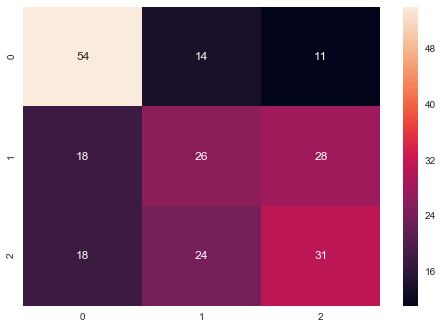

In [67]:
from sklearn.metrics import confusion_matrix
lg_matrix=confusion_matrix(y_test,y_pred_logreg)
print(lg_matrix)

import seaborn as sns
print(sns.heatmap(lg_matrix, annot=True))

Confusion matrix, without normalization
[[54 14 11]
 [18 26 28]
 [18 24 31]]


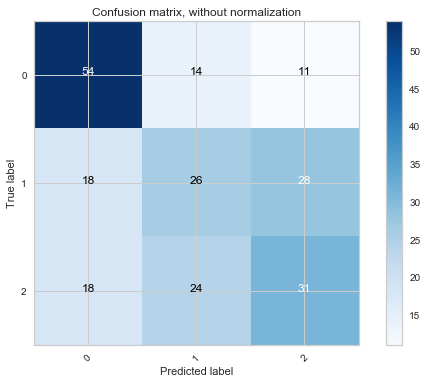

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_logreg)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2'],
                      title='Confusion matrix, without normalization')

C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


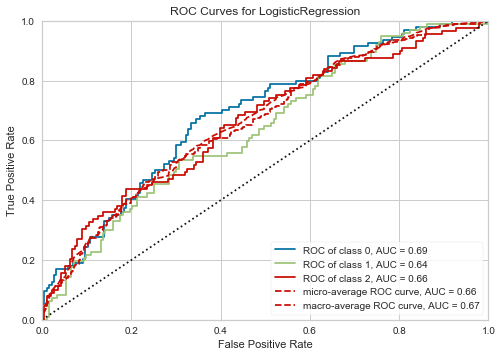

In [77]:
from sklearn.linear_model import LogisticRegression

#from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_game

# Load multi-class classification dataset
#X, y = load_game()

# Encode the non-numeric columns
#X = OrdinalEncoder().fit_transform(X)
#y = LabelEncoder().fit_transform(y)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=342)

# Instaniate the classification model and visualizer
logreg_model = LogisticRegression()
visualizer = ROCAUC(logreg_model, classes=["0", "1", "2"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

# Svm with RBF  Kernel

In [125]:
from sklearn import svm
svm_model = svm.SVC(kernel='rbf')
svm_model = svm_model.fit(x_train,y_train)
y_pred_svm_r = svm_model.predict(x_test)

print(classification_report(y_test,y_pred_svm_r))

C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.36      0.99      0.53        79
           1       0.75      0.04      0.08        72
           2       0.75      0.04      0.08        73

    accuracy                           0.38       224
   macro avg       0.62      0.36      0.23       224
weighted avg       0.61      0.38      0.24       224



# Confusion Matrix & ROC Curve Visualization of Svm

[[62  8  9]
 [25 23 24]
 [32 17 24]]
AxesSubplot(0.125,0.125;0.62x0.755)


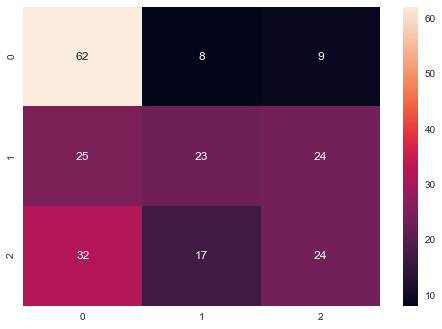

In [69]:
from sklearn.metrics import confusion_matrix
SVM_matrix=confusion_matrix(y_test,y_pred_svm_r)
print(SVM_matrix)

import seaborn as sns
print(sns.heatmap(SVM_matrix, annot=True))

Confusion matrix, without normalization
[[262  10  38]
 [ 67  87  40]
 [ 86  16 134]]


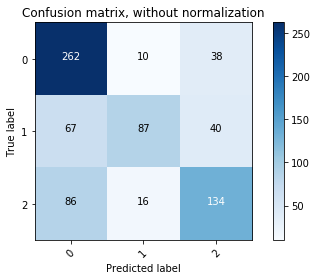

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_svm_r)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2'],
                      title='Confusion matrix, without normalization')

C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


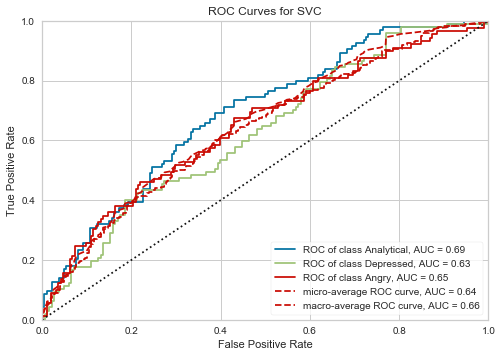

In [76]:
from sklearn import svm

#from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_game

# Load multi-class classification dataset
#X, y = load_game()

# Encode the non-numeric columns
#X = OrdinalEncoder().fit_transform(X)
#y = LabelEncoder().fit_transform(y)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=342)

# Instaniate the classification model and visualizer
svm_model = svm.SVC(kernel='rbf')
visualizer = ROCAUC(svm_model, classes=["Analytical", "Depressed", "Angry"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

# RandomForestClassifier 

In [126]:
from sklearn.ensemble import RandomForestClassifier 
RF = RandomForestClassifier(n_estimators=40)
RF_model = RF.fit(x_train,y_train)
y_pred_RF = RF_model.predict(x_test)

print(classification_report(y_test,y_pred_RF))

C:\Users\Riyad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           0       0.40      0.70      0.51        79
           1       0.39      0.38      0.38        72
           2       0.42      0.11      0.17        73

    accuracy                           0.40       224
   macro avg       0.41      0.39      0.36       224
weighted avg       0.41      0.40      0.36       224



# Confusion Matrix & ROC Curve Visualization of RandomForestClassifier

[[38 35  6]
 [21 44  7]
 [20 33 20]]
AxesSubplot(0.125,0.125;0.62x0.755)


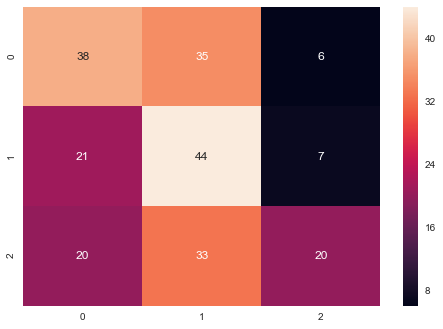

In [74]:
from sklearn.metrics import confusion_matrix
rbf_matrix=confusion_matrix(y_test,y_pred_RF)
print(rbf_matrix)

import seaborn as sns
print(sns.heatmap(rbf_matrix, annot=True))

Confusion matrix, without normalization
[[225  44  41]
 [ 48 117  29]
 [ 78  51 107]]


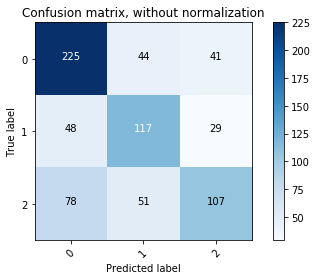

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_RF)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2'],
                      title='Confusion matrix, without normalization')

C:\Users\Riyad\Anaconda3\lib\site-packages\yellowbrick\base.py:390: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y, **kwargs)


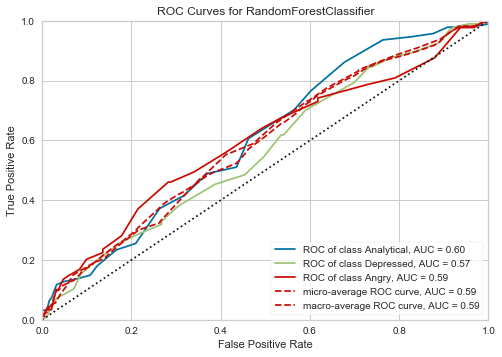

In [75]:
from sklearn.ensemble import RandomForestClassifier 

#from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_game

# Load multi-class classification dataset
#X, y = load_game()

# Encode the non-numeric columns
#X = OrdinalEncoder().fit_transform(X)
#y = LabelEncoder().fit_transform(y)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=342)

# Instaniate the classification model and visualizer
RF = RandomForestClassifier(n_estimators=40)
visualizer = ROCAUC(RF, classes=["Analytical", "Depressed", "Angry"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [48]:
#from sklearn import svm
#svm_model = svm.SVC(kernel='poly')
#svm_model = svm_model.fit(x_train,y_train)
#y_pred_svm = svm_model.predict(x_test)

#print(classification_report(y_test,y_pred_svm))

In [56]:
#from sklearn.tree import DecisionTreeClassifier
#dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
#dtree = dt_model.fit(x_train,y_train)
#y_pred_DT = dtree.predict(x_test)

#print("Classification report - \n", classification_report(y_test,y_pred_DT))

In [55]:
#from sklearn.linear_model import SGDClassifier
#sgb = SGDClassifier()
#sgb_model = sgb.fit(x_train,y_train)
#y_pred_sgb = sgb_model.predict(x_test)

#print(classification_report(y_test,y_pred_sgb))

In [54]:
#from sklearn.naive_bayes import GaussianNB
#gnb = GaussianNB()
#gnb.fit(x_train, y_train)
  
# making predictions on the testing set
#y_pred_gnb = gnb.predict(x_test)
#print(classification_report(y_test,y_pred_gnb))